In [1]:
import pandas as pd
import numpy as np
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\sumer\\Samiksha'

In [3]:
import warnings 
warnings.filterwarnings ('ignore')
pd.set_option("display.max_columns",None)

In [4]:
#application = pd.read_csv('application.csv')

In [5]:
# Import necessary libraries
# Load datasets
bureau = pd.read_csv('bureau.csv')
previous_application = pd.read_csv('previous_application.csv')
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
application = pd.read_csv('application.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

In [6]:
application.head(5)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# Sample 5% of the application data
application_sample = application.sample(frac=0.05, random_state=42)

# Get the sampled SK_IDs
sampled_sk_ids = application_sample['SK_ID_CURR']

# Sample the bureau data using the sampled SK_IDs
bureau_sample = bureau[bureau['SK_ID_CURR'].isin(sampled_sk_ids)]

# Get the sampled BUREAU_IDs
sampled_bureau_ids = bureau_sample['SK_ID_BUREAU']

# Sample the bureau_balance data using the sampled BUREAU_IDs
bureau_balance_sample = bureau_balance[bureau_balance['SK_ID_BUREAU'].isin(sampled_bureau_ids)]

# Sample the rest of the datasets using the sampled SK_IDs
previous_application_sample = previous_application[previous_application['SK_ID_CURR'].isin(sampled_sk_ids)]
pos_cash_balance_sample = pos_cash_balance[pos_cash_balance['SK_ID_CURR'].isin(sampled_sk_ids)]
installments_payments_sample = installments_payments[installments_payments['SK_ID_CURR'].isin(sampled_sk_ids)]
credit_card_balance_sample = credit_card_balance[credit_card_balance['SK_ID_CURR'].isin(sampled_sk_ids)]

# Save the sampled data to new CSV files (optional)
#bureau_sample.to_csv(r'C:/Users/JP/bureau_sample.csv', index=False)
#previous_application_sample.to_csv(r'C:/Users/JP/previous_application_sample.csv', index=False)
#pos_cash_balance_sample.to_csv(r'C:/Users/JP/pos_cash_balance_sample.csv', index=False)
#installments_payments_sample.to_csv(r'C:/Users/JP/installments_payments_sample.csv', index=False)
#credit_card_balance_sample.to_csv(r'C:/Users/JP/credit_card_balance_sample.csv', index=False)
#application_sample.to_csv(r'C:/Users/JP/application_sample.csv', index=False)
#bureau_balance_sample.to_csv(r'C:/Users/JP/bureau_balance_sample.csv', index=False)


## Analyzing SK_ID_CURR

In [8]:
# Check for unique SK_ID_CURR in the application table
is_unique_application = application['SK_ID_CURR'].nunique()

# Count of unique SK_ID_CURR in other datasets
unique_counts = {
    "bureau": bureau['SK_ID_CURR'].nunique(),
    "credit_card_balance": credit_card_balance['SK_ID_CURR'].nunique(),
    "installments_payments": installments_payments['SK_ID_CURR'].nunique(),
    "pos_cash_balance": pos_cash_balance['SK_ID_CURR'].nunique(),
    "previous_application": previous_application['SK_ID_CURR'].nunique()
}

# Percentage of overlap with application data
total_rows = {
    "bureau": len(bureau),
    "credit_card_balance": len(credit_card_balance),
    "installments_payments": len(installments_payments),
    "pos_cash_balance": len(pos_cash_balance),
    "previous_application": len(previous_application)
}

overlap_percentage = {
    "bureau": bureau['SK_ID_CURR'].isin(application['SK_ID_CURR']).mean() * 100,
    "credit_card_balance": credit_card_balance['SK_ID_CURR'].isin(application['SK_ID_CURR']).mean() * 100,
    "installments_payments": installments_payments['SK_ID_CURR'].isin(application['SK_ID_CURR']).mean() * 100,
    "pos_cash_balance": pos_cash_balance['SK_ID_CURR'].isin(application['SK_ID_CURR']).mean() * 100,
    "previous_application": previous_application['SK_ID_CURR'].isin(application['SK_ID_CURR']).mean() * 100
}

# Count of SK_ID_CURR in application that do not have presence in other datasets
no_presence_counts = {
    "bureau": (~application['SK_ID_CURR'].isin(bureau['SK_ID_CURR'])).sum(),
    "credit_card_balance": (~application['SK_ID_CURR'].isin(credit_card_balance['SK_ID_CURR'])).sum(),
    "installments_payments": (~application['SK_ID_CURR'].isin(installments_payments['SK_ID_CURR'])).sum(),
    "pos_cash_balance": (~application['SK_ID_CURR'].isin(pos_cash_balance['SK_ID_CURR'])).sum(),
    "previous_application": (~application['SK_ID_CURR'].isin(previous_application['SK_ID_CURR'])).sum()
}

# Calculate percentage of application IDs not present in other datasets
no_presence_percentage = {key: (value / len(application)) * 100 for key, value in no_presence_counts.items()}

is_unique_application 
unique_counts
total_rows
overlap_percentage
no_presence_counts
no_presence_percentage


307511

{'bureau': 263491,
 'credit_card_balance': 86905,
 'installments_payments': 291643,
 'pos_cash_balance': 289444,
 'previous_application': 291057}

{'bureau': 1465325,
 'credit_card_balance': 3227965,
 'installments_payments': 11591592,
 'pos_cash_balance': 8543375,
 'previous_application': 1413701}

{'bureau': 100.0,
 'credit_card_balance': 100.0,
 'installments_payments': 100.0,
 'pos_cash_balance': 100.0,
 'previous_application': 100.0}

{'bureau': 44020,
 'credit_card_balance': 220606,
 'installments_payments': 15868,
 'pos_cash_balance': 18067,
 'previous_application': 16454}

{'bureau': 14.314935075493235,
 'credit_card_balance': 71.73922233676193,
 'installments_payments': 5.160140612856125,
 'pos_cash_balance': 5.8752369833924645,
 'previous_application': 5.350702901684818}

In [9]:
# Check if SK_ID_BUREAU is unique in the bureau table
is_unique_bureau = bureau['SK_ID_BUREAU'].is_unique

# Count of unique SK_ID_BUREAU in bureau_balance
unique_counts_bureau = bureau_balance['SK_ID_BUREAU'].nunique()

# Total number of rows in bureau_balance
total_rows_bureau_balance = len(bureau_balance)

# Percentage of overlap of bureau_balance with bureau data
overlap_percentage_bureau_balance = bureau_balance['SK_ID_BUREAU'].isin(bureau['SK_ID_BUREAU']).mean() * 100

# Count of SK_ID_BUREAU in bureau that do not have presence in bureau_balance
no_presence_counts_bureau = (~bureau['SK_ID_BUREAU'].isin(bureau_balance['SK_ID_BUREAU'])).sum()

# Calculate percentage of bureau IDs not present in bureau_balance
no_presence_percentage_bureau = (no_presence_counts_bureau / len(bureau)) * 100

is_unique_bureau
unique_counts_bureau 
total_rows_bureau_balance
overlap_percentage_bureau_balance
no_presence_counts_bureau
no_presence_percentage_bureau


True

523515

14701612

100.0

941810

64.2731134731203

In [10]:
application.columns.tolist()

['Unnamed: 0',
 'SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGI

In [11]:
application.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
numerical_cols = ["AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY"
"AMT_GOODS_PRICE"
]

# categorical
discreet_cols = ["CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN", 
"ORGANIZATION_TYPE",
"OCCUPATION_TYPE"
]

ordinal_cols = ['DAYS_BIRTH']

In [13]:
application['TARGET'].value_counts()/application.shape[0]

TARGET
0    0.919271
1    0.080729
Name: count, dtype: float64

In [14]:
application.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

In [15]:
# cash loans are defaulting more compared to Revolving loans

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot of AMT_INCOME_TOTAL by TARGET')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

Text(0, 0.5, 'Density')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


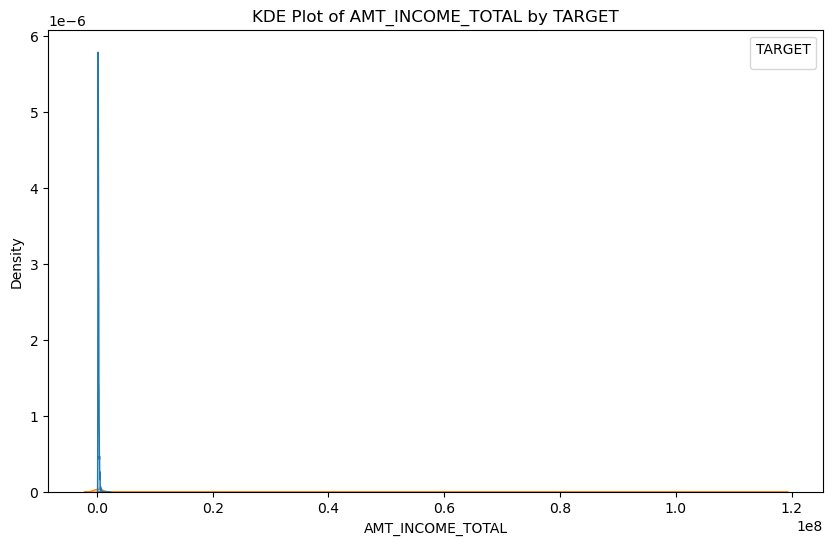

In [16]:
# ploting a kde graph to compare AMT_INCOME_TOTAL with target
plt.figure(figsize=(10, 6))
sns.kdeplot(data=application_sample, x='AMT_INCOME_TOTAL', hue='TARGET', fill=True)
plt.title('KDE Plot of AMT_INCOME_TOTAL by TARGET')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Density')
plt.legend(title='TARGET')
plt.show()

In [17]:
# Due to very small values(small difference between values) in AMT_INCOME_TOTAL the plot showing like above so to get clear we take upto 99 percentile 

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot of AMT_INCOME_TOTAL by TARGET')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

Text(0, 0.5, 'Density')

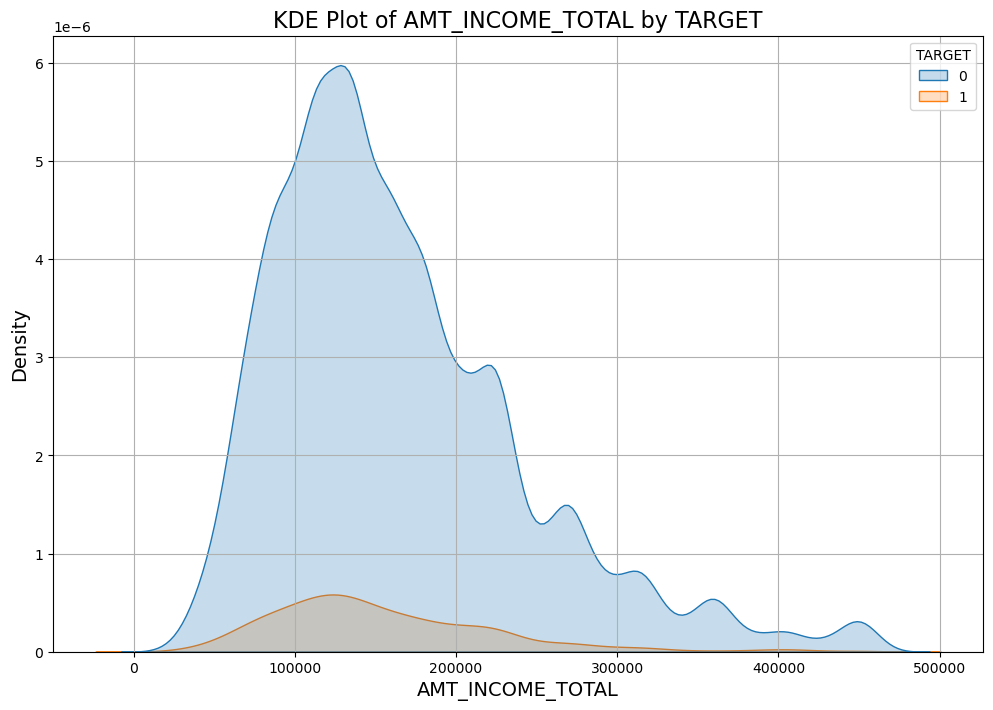

In [18]:
# Ensure 'AMT_INCOME_TOTAL' is numeric and remove any potential non-numeric values
application_sample['AMT_INCOME_TOTAL'] = pd.to_numeric(application_sample['AMT_INCOME_TOTAL'], errors='coerce')

# Trim the 'AMT_INCOME_TOTAL' values up to the 99th quantile
quantile_99 = application_sample['AMT_INCOME_TOTAL'].quantile(0.99)
trimmed_data = application_sample[application_sample['AMT_INCOME_TOTAL'] <= quantile_99]

# Plot KDE plot of 'AMT_INCOME_TOTAL' by 'TARGET' variable with clear legends
plt.figure(figsize=(12, 8))
sns.kdeplot(data=trimmed_data, x='AMT_INCOME_TOTAL', hue='TARGET', fill=True)
plt.title('KDE Plot of AMT_INCOME_TOTAL by TARGET', fontsize=16)
plt.xlabel('AMT_INCOME_TOTAL', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

In [19]:
# Function for the Kde plot
def plot_kde(data, variable, trim=0.99):
    """
    Plots a KDE plot for the specified variable, trimmed at the specified quantile.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    variable (str): The column name of the variable to plot.
    trim (float): The quantile to trim the variable values. Default is 0.99.
    """
    # Ensure the variable is numeric and remove any potential non-numeric values
    data[variable] = pd.to_numeric(data[variable], errors='coerce')

    # Trim the variable values up to the specified quantile
    quantile_value = data[variable].quantile(trim)
    trimmed_data = data[data[variable] <= quantile_value]

    # Plot KDE plot of the specified variable by 'TARGET' variable with clear legends
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=trimmed_data, x=variable, hue='TARGET', fill=True)
    plt.title(f'KDE Plot of {variable} by TARGET', fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True)
    plt.show()

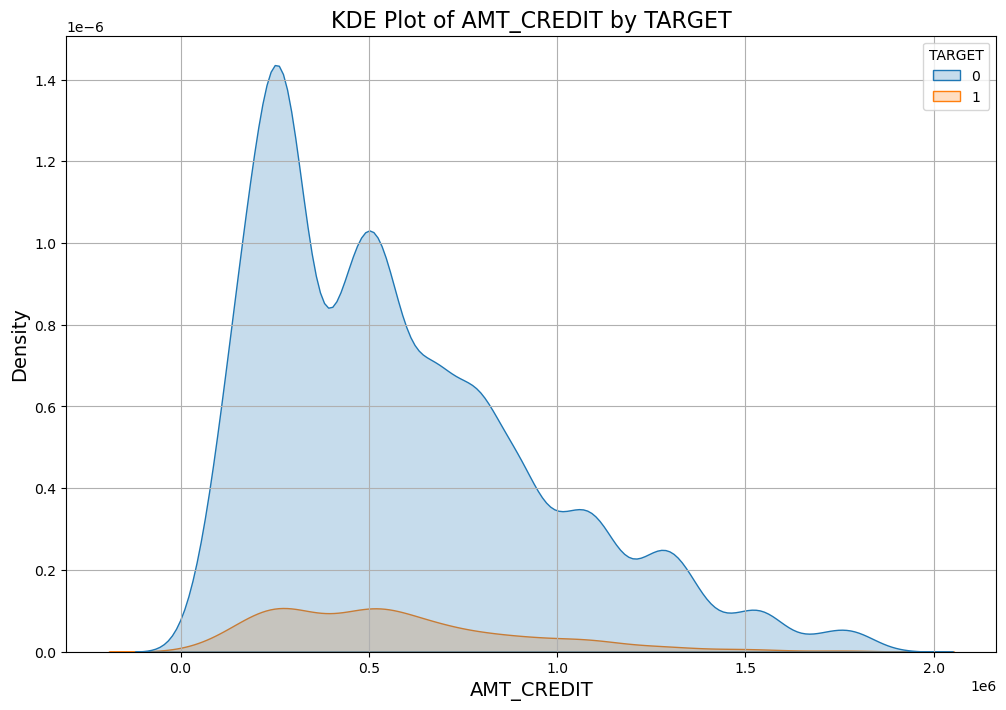

In [20]:
# 'AMT_CREDIT' kde plot
plot_kde(application_sample, 'AMT_CREDIT', trim=0.99)

## Decile Analysis

In [21]:
application['TARGET'].mean()

0.08072881945686496

In [22]:
# To draw a insights and understand the data easily with target we converted continues values of the 'amt_income_total_decile' colmn to 10 decile
application_sample['amt_income_total_decile'] = pd.qcut(application_sample['AMT_INCOME_TOTAL'], 10, labels=False) + 1
# Calculate the percentage of data in each decile
application_sample['amt_income_total_decile'].value_counts(normalize=True).sort_index()

amt_income_total_decile
1     0.111212
2     0.095929
3     0.119277
4     0.157778
5     0.019121
6     0.096774
7     0.099961
8     0.142625
9     0.066988
10    0.090336
Name: proportion, dtype: float64

In [23]:
def average_target_by_decile(data, variable, ntiles=10):
    """
    Calculates the average of TARGET variable by deciles of the specified variable.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    variable (str): The column name of the variable to create deciles.
    ntiles (int): The number of ntiles to create. Default is 10.

    Returns:
    pd.DataFrame: A DataFrame with the average TARGET value for each decile.
    """
    # Ensure the variable is numeric and remove any potential non-numeric values
    data[variable] = pd.to_numeric(data[variable], errors='coerce')

    # Create deciles for the specified variable
    decile_column = f'{variable}_decile'
    data[decile_column] = pd.qcut(data[variable], ntiles, labels=False) + 1

    # Calculate the average of TARGET by deciles
    decile_target_avg = data.groupby(decile_column)['TARGET'].mean().reset_index()

    # Rename columns for clarity
    decile_target_avg.columns = [decile_column, 'Average_TARGET']

    return decile_target_avg

In [24]:
decile_target_avg = average_target_by_decile(application_sample, 'AMT_INCOME_TOTAL')
decile_target_avg

,AMT_INCOME_TOTAL_decile,Average_TARGET
0,1,0.083626
1,2,0.080678
2,3,0.095420
3,4,0.092333
4,5,0.098639
5,6,0.080645
6,7,0.075472
7,8,0.086639
8,9,0.062136
9,10,0.053276


In [25]:
# Average tolerance default rate is 0.080 but when checked AMT_INCOME_TOTAL_decile with Target 
# the people With medium income (i.e income deciles 3,4,5) is defaulting more
# Higher the amount less risk

In [26]:
decile_target_avg = average_target_by_decile(application_sample, 'AMT_ANNUITY')
decile_target_avg.to_clipboard() # code is used to copy the result

In [27]:
decile_target_avg
# AMT_ANNUITY_decile (EMI Amount )the people with less EMI default rate is less
# Risk incerases with incerasing EMI amount and then it decrease 

,AMT_ANNUITY_decile,Average_TARGET
0,1.0,0.066970
1,2.0,0.077955
2,3.0,0.079470
3,4.0,0.079375
4,5.0,0.074675
5,6.0,0.102932
6,7.0,0.107282
7,8.0,0.093689
8,9.0,0.078074
9,10.0,0.055267


In [28]:
# analysing relation between amt_income_total_decile and amt_credit_decile with respect to Target(By Default rate)

In [29]:
# Create deciles for 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'
application['amt_income_total_decile'] = pd.qcut(application['AMT_INCOME_TOTAL'], 5, labels=False) + 1
application['amt_credit_decile'] = pd.qcut(application['AMT_CREDIT'], 5, labels=False) + 1

# 1. Pivot of total defaults (Expressed as overall %) (TARGET)
pivot_total_defaults = pd.crosstab(application['amt_credit_decile'], application['amt_income_total_decile'], 
                                   values=application['TARGET'], aggfunc='sum', normalize='all')

# 2. % of default group by AMT_CREDIT (TARGET)
default_by_amt_credit = application.groupby('amt_credit_decile')['TARGET'].mean()

# 3. Pivot of row wise percentage (TARGET)
pivot_row_wise_percentage = pd.crosstab(application['amt_credit_decile'], application['amt_income_total_decile'], 
                                        values=application['TARGET'], aggfunc='mean')

# 4. Pivot of column wise percentage (TARGET)
overall_data_percent = pd.crosstab(application['amt_credit_decile'], application['amt_income_total_decile'], 
                                           values=application['TARGET'], aggfunc='count', normalize = 'all')

# Display the results

pivot_total_defaults


default_by_amt_credit


#pivot_row_wise_percentage.to_clipboard()
pivot_row_wise_percentage
overall_data_percent


amt_income_total_decile,1,2,3,4,5
amt_credit_decile,,,,,
1,0.072226,0.063041,0.018046,0.027915,0.008056
2,0.059376,0.076576,0.025660,0.039194,0.013857
3,0.041249,0.074924,0.036093,0.068036,0.029003
4,0.027754,0.053535,0.025821,0.061229,0.034240
5,0.009869,0.028600,0.018409,0.048701,0.038590


amt_credit_decile
1    0.072376
2    0.091724
3    0.100549
4    0.078549
5    0.060752
Name: TARGET, dtype: float64

amt_income_total_decile,1,2,3,4,5
amt_credit_decile,,,,,
1,0.067896,0.076397,0.075269,0.076515,0.066159
2,0.099467,0.093576,0.092547,0.083670,0.077269
3,0.096522,0.105216,0.109148,0.100848,0.086663
4,0.080878,0.078877,0.081294,0.082100,0.069348
5,0.073884,0.068079,0.070049,0.061794,0.050215


amt_income_total_decile,1,2,3,4,5
amt_credit_decile,,,,,
1,0.085877,0.066616,0.019355,0.029453,0.009831
2,0.048190,0.066063,0.022383,0.037817,0.014478
3,0.034500,0.057487,0.026695,0.054463,0.027017
4,0.027703,0.054792,0.025641,0.060206,0.039859
5,0.010783,0.033914,0.021216,0.063624,0.062040


##### these are the Average Targets of the amt_credit_decile and we are anlyzing with pivot
* amt_credit_decile
* 1  -  0.072376
* 2  -  0.091724
* 3  -  0.100549
* 4  -  0.078549
* 5  - 0.060752

In [30]:
# looking for default count
# people with High credit and low incomes amounts have higher default
# Low income and low credit amount higher defaults 
# people with medium credit more likely to default

In [31]:
#creating Function
def analyze_continous_vars(application, variable1, variable2):
    #variable1 = 'amt_income_total'
    #variable2 = 'amt_credit'

    # Dynamically create the column names
    decile_column_name1 = f"{variable1}_decile"
    decile_column_name2 = f"{variable2}_decile"
    application[decile_column_name1] = pd.qcut(application[variable1], 5, labels=False) + 1
    application[decile_column_name2] = pd.qcut(application[variable2], 5, labels=False) + 1

    # Pivot of total defaults (Expressed as overall %) (TARGET)
    pivot_total_defaults = pd.crosstab(application[decile_column_name2], application[decile_column_name1], 
                                       values=application['TARGET'], aggfunc='sum', normalize='all')

    # % of default group by AMT_CREDIT (TARGET)
    default_by_amt_credit = application.groupby(decile_column_name2)['TARGET'].mean()

    # Pivot of row wise percentage (TARGET)
    pivot_row_wise_percentage = pd.crosstab(application[decile_column_name2], application[decile_column_name1], 
                                            values=application['TARGET'],aggfunc='mean')

    # Pivot of column wise percentage (TARGET)
    overall_data_percent = pd.crosstab(application[decile_column_name2], application[decile_column_name1], 
                                       values=application['TARGET'],aggfunc='count', normalize='all')

    # Display the results
    return pivot_total_defaults, default_by_amt_credit, pivot_row_wise_percentage, overall_data_percent

In [32]:
pivot_total_defaults, default_by_amt_credit, pivot_row_wise_percentage, overall_data_percent = analyze_continous_vars(application, 'AMT_INCOME_TOTAL', 'AMT_ANNUITY')
print('pivot_total_defaults: ',
      pivot_total_defaults)
print('default_by_amt_credit: ',
      default_by_amt_credit)
print('pivot_row_wise_percentage: ',
      pivot_row_wise_percentage)
print('overall_data_percent: ',
      overall_data_percent.to_clipboard())

pivot_total_defaults:  AMT_INCOME_TOTAL_decile         1         2         3         4         5
AMT_ANNUITY_decile                                                       
1.0                      0.072508  0.056717  0.014139  0.022638  0.006163
2.0                      0.062437  0.073917  0.025740  0.037583  0.012931
3.0                      0.044149  0.070614  0.029124  0.054179  0.019940
4.0                      0.024975  0.066506  0.035650  0.070614  0.033434
5.0                      0.006405  0.028922  0.019376  0.060060  0.051279
default_by_amt_credit:  AMT_ANNUITY_decile
1.0    0.069488
2.0    0.085830
3.0    0.087911
4.0    0.093390
5.0    0.067042
Name: TARGET, dtype: float64
pivot_row_wise_percentage:  AMT_INCOME_TOTAL_decile         1         2         3         4         5
AMT_ANNUITY_decile                                                       
1.0                      0.068611  0.073131  0.066339  0.069529  0.057845
2.0                      0.087888  0.085708  0.090459  0.

In [33]:
pivot_total_defaults, default_by_amt_credit, pivot_row_wise_percentage, overall_data_percent = analyze_continous_vars(application, 'AMT_INCOME_TOTAL', 'AMT_ANNUITY')
pivot_total_defaults
default_by_amt_credit
pivot_row_wise_percentage.to_clipboard()
pivot_row_wise_percentage
overall_data_percent

AMT_INCOME_TOTAL_decile,1,2,3,4,5
AMT_ANNUITY_decile,,,,,
1.0,0.072508,0.056717,0.014139,0.022638,0.006163
2.0,0.062437,0.073917,0.025740,0.037583,0.012931
3.0,0.044149,0.070614,0.029124,0.054179,0.019940
4.0,0.024975,0.066506,0.035650,0.070614,0.033434
5.0,0.006405,0.028922,0.019376,0.060060,0.051279


AMT_ANNUITY_decile
1.0    0.069488
2.0    0.085830
3.0    0.087911
4.0    0.093390
5.0    0.067042
Name: TARGET, dtype: float64

AMT_INCOME_TOTAL_decile,1,2,3,4,5
AMT_ANNUITY_decile,,,,,
1.0,0.068611,0.073131,0.066339,0.069529,0.057845
2.0,0.087888,0.085708,0.090459,0.082515,0.078734
3.0,0.094761,0.089709,0.086411,0.086651,0.075388
4.0,0.099855,0.100036,0.106370,0.090576,0.075011
5.0,0.078596,0.079355,0.075062,0.070191,0.055924


AMT_INCOME_TOTAL_decile,1,2,3,4,5
AMT_ANNUITY_decile,,,,,
1.0,0.085317,0.062612,0.017207,0.026286,0.008602
2.0,0.057353,0.069626,0.022972,0.036771,0.013259
3.0,0.037613,0.063548,0.027210,0.050478,0.021353
4.0,0.020192,0.053672,0.027057,0.062940,0.035984
5.0,0.006579,0.029424,0.020839,0.069080,0.074026


In [34]:
# people with high credit_AMT and very low to medium income more default
# people with very high credit_AMT and very low to high income more default
#people with low credit_AMT and very high income and very high credit_AMT and very high income less likely to default 

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

Text(0.5, 1.0, 'Box Plot of AMT_CREDIT by TARGET')

Text(0.5, 0, 'TARGET')

Text(0, 0.5, 'AMT_CREDIT')

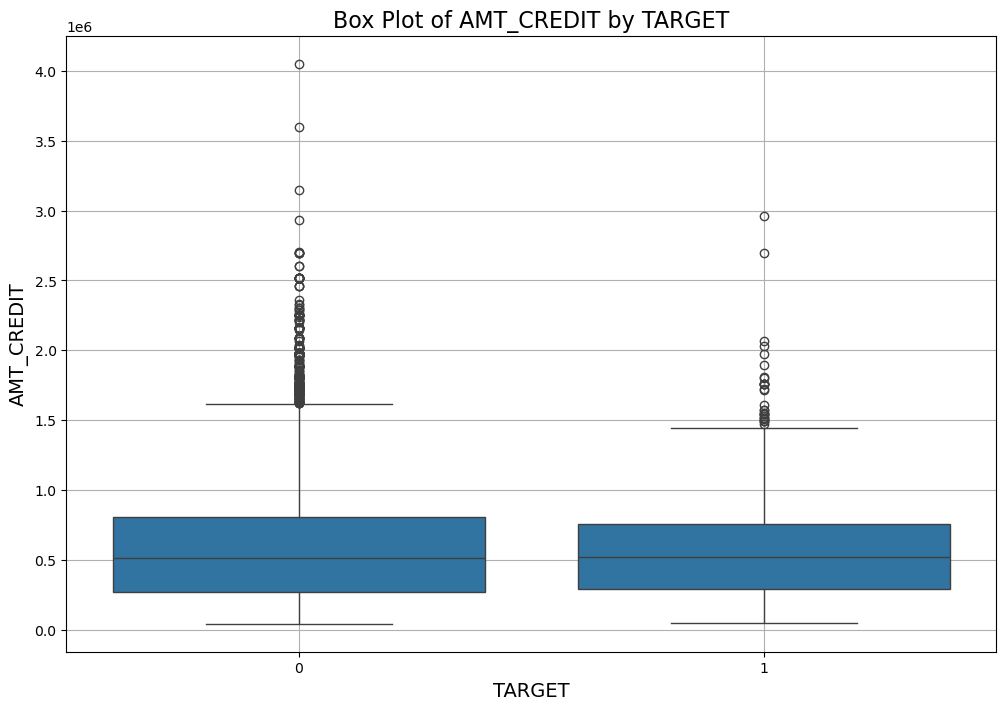

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

Text(0.5, 1.0, 'Box Plot of AMT_INCOME_TOTAL by TARGET')

Text(0.5, 0, 'TARGET')

Text(0, 0.5, 'AMT_INCOME_TOTAL')

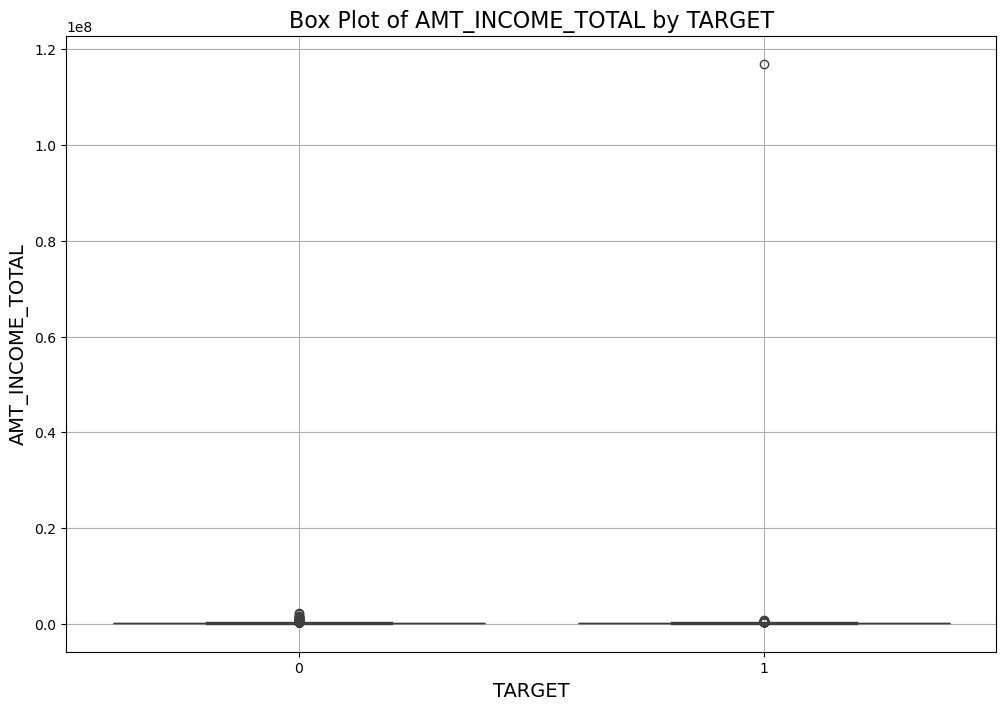

In [35]:
# Plot box plot of 'AMT_CREDIT' split by 'TARGET' variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=application_sample, x='TARGET', y='AMT_CREDIT')
plt.title('Box Plot of AMT_CREDIT by TARGET', fontsize=16)
plt.xlabel('TARGET', fontsize=14)
plt.ylabel('AMT_CREDIT', fontsize=14)
plt.grid(True)
plt.show()

# Plot box plot of 'AMT_INCOME_TOTAL' split by 'TARGET' variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=application_sample, x='TARGET', y='AMT_INCOME_TOTAL')
plt.title('Box Plot of AMT_INCOME_TOTAL by TARGET', fontsize=16)
plt.xlabel('TARGET', fontsize=14)
plt.ylabel('AMT_INCOME_TOTAL', fontsize=14)
plt.grid(True)
plt.show()

# Analyze discreate var

In [36]:
print(application['TARGET'].dtypes)

int64


In [37]:
# Ensure 'TARGET' is treated as a categorical type
#application['TARGET'] = application['TARGET'].astype('int')

In [38]:
application['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

Text(0.5, 1.0, 'Distribution of OCCUPATION_TYPE by TARGET')

Text(0.5, 0, 'OCCUPATION_TYPE')

Text(0, 0.5, 'Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

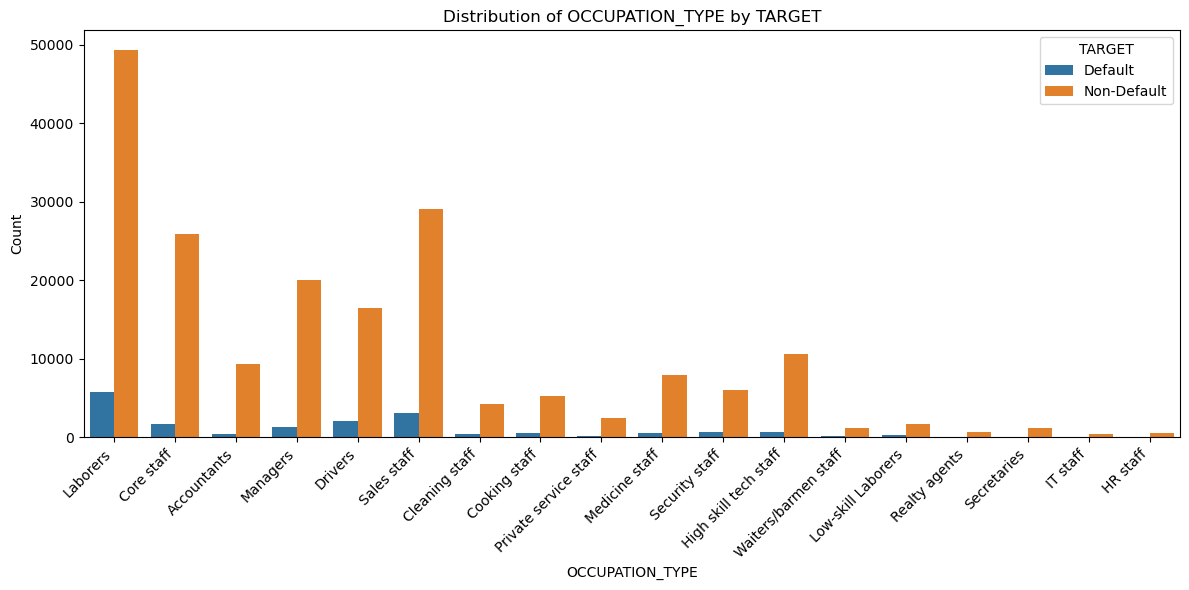

In [39]:
# Create a temporary column for plotting
application['TARGET_LABEL'] = application['TARGET'].map({0: 'Non-Default', 1: 'Default'})

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET_LABEL', data=application)
plt.title('Distribution of OCCUPATION_TYPE by TARGET')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='TARGET')
plt.tight_layout()
plt.show()

# Drop the temporary column
application.drop('TARGET_LABEL', axis=1, inplace=True)


In [40]:
# Laborers has more defaults followed by the sales staff and ratio for giving the loan is also more compare to other departments

In [41]:
# application['TARGET'] = pd.to_numeric(application['TARGET'], errors='coerce')

In [42]:
application.groupby('OCCUPATION_TYPE')[['TARGET']].mean()
pd.DataFrame(application['OCCUPATION_TYPE'].value_counts()/application.shape[0]).to_clipboard()

,TARGET
OCCUPATION_TYPE,
Accountants,0.048303
Cleaning staff,0.096067
Cooking staff,0.104440
Core staff,0.063040
Drivers,0.113261
HR staff,0.063943
High skill tech staff,0.061599
IT staff,0.064639
Laborers,0.105788


In [43]:
# Accountants have very low default
# Laborers in genral have high defaults
# Security,cooking and sales staff have high defaults

In [44]:
# thresh in the function convert which function have less than 1% data converts to others
def analyze_categorical_continuous(application, categorical_variable, continuous_variable, thresh=0.01):
    # Handle NaN values in categorical_variable by replacing them with a placeholder
    application[categorical_variable] = application[categorical_variable].fillna('Missing')

    # Calculate value counts of categorical_variable
    value_counts = application[categorical_variable].value_counts(normalize=True)
    
    # Map values to 'other' if contribution is less than thresh
    application[f'{categorical_variable}_thresholded'] = application[categorical_variable].apply(lambda x: x if value_counts[x] >= thresh else 'other')

    # Create deciles for the continuous variable
    application['continuous_variable_decile'] = pd.qcut(application[continuous_variable], 5, labels=False) + 1

    # Pivot of total defaults (Expressed as overall %) (TARGET)
    pivot_total_defaults = pd.crosstab(application[f'{categorical_variable}_thresholded'], application['continuous_variable_decile'], 
                                       values=application['TARGET'], aggfunc='sum', normalize='all')

    # % of default group by the continuous variable (TARGET)
    default_by_continuous = application.groupby(f'{categorical_variable}_thresholded')['TARGET'].mean()

    # Pivot of row wise percentage (TARGET)
    pivot_row_wise_percentage = pd.crosstab(application[f'{categorical_variable}_thresholded'], application['continuous_variable_decile'], 
                                            values=application['TARGET'], aggfunc='mean')

    # Pivot of column wise percentage (TARGET)
    overall_data_percent = pd.crosstab(application[f'{categorical_variable}_thresholded'], application['continuous_variable_decile'], 
                                       values=application['TARGET'], aggfunc='count', normalize='all')

    # Return the results
    return pivot_total_defaults, default_by_continuous, pivot_row_wise_percentage, overall_data_percent

In [45]:
pivot_total_defaults, default_by_continuous, pivot_row_wise_percentage, overall_data_percent = analyze_categorical_continuous(application, 'OCCUPATION_TYPE', 'AMT_ANNUITY')
pivot_total_defaults
default_by_continuous
pivot_row_wise_percentage
overall_data_percent.to_clipboard()

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
OCCUPATION_TYPE_thresholded,,,,,
Accountants,0.002578,0.003061,0.003867,0.005599,0.003988
Cleaning staff,0.003867,0.005076,0.004149,0.003907,0.001007
Cooking staff,0.005519,0.005519,0.005921,0.005237,0.002820
Core staff,0.012729,0.013736,0.014421,0.016556,0.012568
Drivers,0.010312,0.015549,0.018046,0.023686,0.017281
High skill tech staff,0.004471,0.005398,0.006284,0.006284,0.005801
Laborers,0.038107,0.051158,0.052729,0.057281,0.035891
Managers,0.005398,0.006928,0.010070,0.013333,0.017764
Medicine staff,0.004552,0.005317,0.004834,0.005519,0.002820


OCCUPATION_TYPE_thresholded
Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
High skill tech staff    0.061599
Laborers                 0.105788
Managers                 0.062140
Medicine staff           0.067002
Missing                  0.065131
Sales staff              0.096318
Security staff           0.107424
other                    0.098181
Name: TARGET, dtype: float64

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
OCCUPATION_TYPE_thresholded,,,,,
Accountants,0.043986,0.047293,0.055331,0.065721,0.034138
Cleaning staff,0.079933,0.106961,0.102284,0.122013,0.052966
Cooking staff,0.107199,0.103240,0.113426,0.110357,0.080831
Core staff,0.056408,0.065996,0.068321,0.072872,0.052703
Drivers,0.094222,0.119431,0.119882,0.131104,0.096818
High skill tech staff,0.054358,0.066634,0.069892,0.065629,0.053000
Laborers,0.087181,0.112929,0.114855,0.119225,0.091263
Managers,0.056303,0.064371,0.072067,0.068261,0.055125
Medicine staff,0.063950,0.071467,0.067454,0.080023,0.048917


In [46]:
overall_data_percent

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
OCCUPATION_TYPE_thresholded,,,,,
Accountants,0.004732,0.005226,0.005642,0.006878,0.009431
Cleaning staff,0.003906,0.003831,0.003275,0.002585,0.001535
Cooking staff,0.004156,0.004315,0.004215,0.003831,0.002816
Core staff,0.018218,0.016803,0.017041,0.018342,0.019252
Drivers,0.008836,0.010511,0.012153,0.014585,0.014410
High skill tech staff,0.006641,0.006540,0.007259,0.007730,0.008836
Laborers,0.035288,0.036572,0.037064,0.038787,0.031750
Managers,0.007740,0.008689,0.011281,0.015769,0.026016
Medicine staff,0.005746,0.006007,0.005785,0.005567,0.004654


In [47]:
# Labores with low-higher EMI's have high defaults
# sales staff and Security staff defaults on Low-High EMI

In [48]:
# cleaning staff with medium EMI have high defaults
# cooking staff with medium and high EMI have high defaults
# Medicine staff and Drivers with high EMI have more defaults

In [49]:
application['TARGET'].mean()

0.08072881945686496

In [50]:
# Initialize an empty DataFrame for features
features = pd.DataFrame({'SK_ID_CURR': application['SK_ID_CURR']})

In [51]:
def average_target_by_decile(data, variable, ntiles=10):
    # Ensure the variable is numeric and remove any potential non-numeric values
    data[variable] = pd.to_numeric(data[variable], errors='coerce')

    # Create deciles for the specified variable
    decile_column = f'{variable}_decile'
    data[decile_column] = pd.qcut(data[variable], ntiles, labels=False) + 1

    # Calculate the average of TARGET by deciles
    decile_target_avg = data.groupby(decile_column)['TARGET'].mean().reset_index()

    # Rename columns for clarity
    decile_target_avg.columns = [decile_column, 'Average_TARGET']

    return decile_target_avg

## Demographic Data

## Age

In [52]:
# Calculate the age of the clients
application['AGE'] = -application['DAYS_BIRTH'] / 365
# Define age buckets
bins = [0, 25, 35, 45, 55, 65, 75]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65-75']

# Create a new column for age buckets
application['age_bucket'] = pd.cut(application['AGE'], bins=bins, labels=labels, right=False)

# Display the distribution of the age buckets
age_bucket_distribution = application['age_bucket'].value_counts().sort_index()
age_bucket_distribution

age_bucket
<25      12150
25-35    72289
35-45    84276
45-55    70069
55-65    60605
65-75     8122
Name: count, dtype: int64

In [53]:
application.groupby('age_bucket')[['TARGET']].mean()

,TARGET
age_bucket,
<25,0.123128
25-35,0.106738
35-45,0.084045
45-55,0.070588
55-65,0.054154
65-75,0.037183


In [54]:
average_target_by_decile(application, 'AMT_INCOME_TOTAL')

,AMT_INCOME_TOTAL_decile,Average_TARGET
0,1,0.081908
1,2,0.082232
2,3,0.087192
3,4,0.084894
4,5,0.090007
5,6,0.086407
6,7,0.084224
7,8,0.078065
8,9,0.070401
9,10,0.061375


In [55]:
application.groupby(['FLAG_OWN_CAR'])[['TARGET']].mean()

,TARGET
FLAG_OWN_CAR,
N,0.085002
Y,0.072437


In [56]:
# FLAG_OWN_REALTY

In [57]:
application.groupby(['FLAG_OWN_REALTY'])[['TARGET']].mean()

,TARGET
FLAG_OWN_REALTY,
N,0.083249
Y,0.079616


In [58]:
application['cnt_children_bucket'] = np.where(application['CNT_CHILDREN']>3, '3+', application['CNT_CHILDREN'])
application.groupby(['cnt_children_bucket'])[['TARGET']].mean().to_clipboard()

In [59]:
application.groupby(['cnt_children_bucket'])[['TARGET']].mean()

,TARGET
cnt_children_bucket,
0,0.077118
1,0.089236
2,0.087218
3,0.096314
3+,0.127928


In [60]:
pivot_total_defaults, default_by_continuous, pivot_row_wise_percentage, overall_data_percent = analyze_categorical_continuous(application, 'cnt_children_bucket', 'AMT_ANNUITY')
pivot_total_defaults
default_by_continuous
pivot_row_wise_percentage
overall_data_percent.to_clipboard()

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
cnt_children_bucket_thresholded,,,,,
0,0.117059,0.147674,0.144330,0.151541,0.108439
1,0.038066,0.044713,0.048298,0.051239,0.037382
2,0.014421,0.016878,0.021712,0.023686,0.017281
3,0.002175,0.002659,0.003021,0.004068,0.002497
other,0.000443,0.000685,0.000645,0.000645,0.000443


cnt_children_bucket_thresholded
0        0.077118
1        0.089236
2        0.087218
3        0.096314
other    0.127928
Name: TARGET, dtype: float64

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
cnt_children_bucket_thresholded,,,,,
0,0.067135,0.082718,0.082288,0.089378,0.063911
1,0.076961,0.096321,0.101199,0.100450,0.072472
2,0.069313,0.086445,0.101107,0.101713,0.076267
3,0.080477,0.094286,0.103164,0.125622,0.076074
other,0.103774,0.163462,0.140351,0.141593,0.093220


In [61]:
# In all category of the children bucket with low to high (not very high) EMI have more deafault rate
# 

In [62]:
def analyze_categorical_continuous(application, categorical_variable, continuous_variable, thresh=0.01):
    # Handle NaN values in categorical_variable by replacing them with a placeholder
    application[categorical_variable] = application[categorical_variable].fillna('Missing')

    # Calculate value counts of categorical_variable
    value_counts = application[categorical_variable].value_counts(normalize=True)
    
    # Map values to 'other' if contribution is less than thresh
    application[f'{categorical_variable}_thresholded'] = application[categorical_variable].apply(lambda x: x if value_counts[x] >= thresh else 'other')

    # Create deciles for the continuous variable
    application['continuous_variable_decile'] = pd.qcut(application[continuous_variable], 5, labels=False) + 1

    # Pivot of total defaults (Expressed as overall %) (TARGET)
    pivot_total_defaults = pd.crosstab(application[f'{categorical_variable}_thresholded'], application['continuous_variable_decile'], 
                                       values=application['TARGET'], aggfunc='sum', normalize='all')

    # % of default group by the continuous variable (TARGET)
    default_by_continuous = application.groupby(f'{categorical_variable}_thresholded')['TARGET'].mean()

    # Pivot of row wise percentage (TARGET)
    pivot_row_wise_percentage = pd.crosstab(application[f'{categorical_variable}_thresholded'], application['continuous_variable_decile'], 
                                            values=application['TARGET'], aggfunc='mean')

    # Pivot of column wise percentage (TARGET)
    overall_data_percent = pd.crosstab(application[f'{categorical_variable}_thresholded'], application['continuous_variable_decile'], 
                                       values=application['TARGET'], aggfunc='count', normalize='all')

    # Return the results
    return pivot_total_defaults, pd.DataFrame(default_by_continuous), pivot_row_wise_percentage, overall_data_percent


In [63]:
application['age_bucket'] = application['age_bucket'].astype('object')
pivot_total_defaults, default_by_continuous, pivot_row_wise_percentage, overall_data_percent = analyze_categorical_continuous(application, 'age_bucket', 'AMT_ANNUITY')
pivot_total_defaults
default_by_continuous
pivot_row_wise_percentage
overall_data_percent

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
age_bucket_thresholded,,,,,
25-35,0.052125,0.067633,0.070735,0.071984,0.048338
35-45,0.042779,0.056475,0.062155,0.071420,0.052487
45-55,0.028640,0.040000,0.042659,0.049305,0.038630
55-65,0.025498,0.031782,0.028157,0.026707,0.020060
65-75,0.004028,0.003867,0.002820,0.001128,0.000322
<25,0.019094,0.012850,0.011480,0.010634,0.006203


,TARGET
age_bucket_thresholded,
25-35,0.106738
35-45,0.084045
45-55,0.070588
55-65,0.054154
65-75,0.037183
<25,0.123128


continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
age_bucket_thresholded,,,,,
25-35,0.086411,0.115578,0.121548,0.120223,0.089074
35-45,0.072950,0.091104,0.092307,0.095973,0.068092
45-55,0.061293,0.075176,0.075600,0.081162,0.059315
55-65,0.049028,0.058298,0.057721,0.061275,0.044349
65-75,0.034518,0.037900,0.032214,0.087774,0.040000
<25,0.103811,0.138575,0.135199,0.139388,0.120407


continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
age_bucket_thresholded,,,,,
25-35,0.048699,0.047242,0.046982,0.048338,0.043812
35-45,0.047343,0.050046,0.054361,0.060078,0.062231
45-55,0.037724,0.042956,0.045555,0.049044,0.052579
55-65,0.041987,0.044013,0.039382,0.035187,0.036517
65-75,0.009421,0.008237,0.007067,0.001037,0.000650
<25,0.014849,0.007486,0.006855,0.006159,0.004159


In [64]:
# in the Age bucket of 25-35,35-45,<25 with low to high EMI  have high defaults
# 65-75 Age bucket high EMI  have high defaults

In [65]:
def analyze_categorical_categorical(application, categorical_variable1, categorical_variable2, thresh=0.01):
    # Calculate value counts of categorical_variable1 and categorical_variable2
    value_counts1 = application[categorical_variable1].value_counts(normalize=True)
    value_counts2 = application[categorical_variable2].value_counts(normalize=True)

    # Map values to 'other' if contribution is less than thresh for categorical_variable1
    application[f'{categorical_variable1}_thresholded'] = application[categorical_variable1].apply(lambda x: x if value_counts1[x] >= thresh else 'other1')

    # Map values to 'other' if contribution is less than thresh for categorical_variable2
    application[f'{categorical_variable2}_thresholded'] = application[categorical_variable2].apply(lambda x: x if value_counts2[x] >= thresh else 'other2')

    # Pivot of total defaults (Expressed as overall %) (TARGET)
    pivot_total_defaults = pd.crosstab(application[f'{categorical_variable1}_thresholded'], application[f'{categorical_variable2}_thresholded'], 
                                       values=application['TARGET'], aggfunc='sum', normalize='all')

    # % of default group by categorical_variable2 (TARGET)
    default_by_categorical2 = application.groupby(f'{categorical_variable1}_thresholded')['TARGET'].mean()

    # Pivot of row wise percentage (TARGET)
    pivot_row_wise_percentage = pd.crosstab(application[f'{categorical_variable1}_thresholded'], application[f'{categorical_variable2}_thresholded'], 
                                            values=application['TARGET'], aggfunc='mean')

    # Pivot of column wise percentage (TARGET)
    overall_data_percent = pd.crosstab(application[f'{categorical_variable1}_thresholded'], application[f'{categorical_variable2}_thresholded'], 
                                       values=application['TARGET'], aggfunc='count', normalize='all')

    # Return the results
    return pivot_total_defaults, pd.DataFrame(default_by_categorical2), pivot_row_wise_percentage, overall_data_percent


In [66]:
pivot_total_defaults, default_by_categorical2, pivot_row_wise_percentage, overall_data_percent = analyze_categorical_categorical(application, 'cnt_children_bucket', 'FLAG_OWN_CAR')
pivot_total_defaults
default_by_categorical2
pivot_row_wise_percentage
overall_data_percent

FLAG_OWN_CAR_thresholded,N,Y
cnt_children_bucket_thresholded,,
0,0.480604,0.188439
1,0.142840,0.076858
2,0.060785,0.033192
3,0.008862,0.005559
other1,0.001732,0.001128


,TARGET
cnt_children_bucket_thresholded,
0,0.077118
1,0.089236
2,0.087218
3,0.096314
other1,0.127928


FLAG_OWN_CAR_thresholded,N,Y
cnt_children_bucket_thresholded,,
0,0.079994,0.070641
1,0.097135,0.077520
2,0.101262,0.069553
3,0.107685,0.082437
other1,0.132716,0.121212


FLAG_OWN_CAR_thresholded,N,Y
cnt_children_bucket_thresholded,,
0,0.485020,0.215348
1,0.118714,0.080039
2,0.048460,0.038525
3,0.006644,0.005444
other1,0.001054,0.000751


### PAST LOAN INTERNAL

#### Creating the variables

In [67]:
# Import necessary libraries
# Calculate PREV_APP_APPROVAL_RATIO
approved_apps = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved'].groupby('SK_ID_CURR').size()
total_apps = previous_application.groupby('SK_ID_CURR').size()
prev_app_approval_ratio = (approved_apps / total_apps).rename('PREV_APP_APPROVAL_RATIO').fillna(0)

# Calculate PREV_APP_MAX_ANNUITY
prev_app_max_annuity = previous_application.groupby('SK_ID_CURR')['AMT_ANNUITY'].max().rename('PREV_APP_MAX_ANNUITY').fillna(0)

# Calculate PREV_APP_CREDIT_RATIO
approved_credit = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved'].groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
applied_credit = previous_application.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
prev_app_credit_ratio = (approved_credit / applied_credit).rename('PREV_APP_CREDIT_RATIO').fillna(0)

# Calculate PREV_APP_REFUSED_COUNT
refused_apps = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused'].groupby('SK_ID_CURR').size().rename('PREV_APP_REFUSED_COUNT').fillna(0)

# Combine all calculated variables into a single dataframe
prev_app_features = pd.DataFrame({
    'SK_ID_CURR': total_apps.index,
    'PREV_APP_APPROVAL_RATIO': prev_app_approval_ratio,
    'PREV_APP_MAX_ANNUITY': prev_app_max_annuity,
    'PREV_APP_CREDIT_RATIO': prev_app_credit_ratio,
    'PREV_APP_REFUSED_COUNT': refused_apps
}).reset_index(drop=True)

# Perform left join with application data to include TARGET variable
prev_app_features = application[['SK_ID_CURR', 'TARGET']].merge(prev_app_features, on='SK_ID_CURR', how='left')

# Fill NA values with 0 for the newly created features in case there are any mismatches
# Display the first few rows of the final dataset including the TARGET variable
prev_app_features.head()

,SK_ID_CURR,TARGET,PREV_APP_APPROVAL_RATIO,PREV_APP_MAX_ANNUITY,PREV_APP_CREDIT_RATIO,PREV_APP_REFUSED_COUNT
0,100002,1,1.000000,9251.775,1.000000,NaN
1,100003,0,1.000000,98356.995,1.000000,NaN
2,100004,0,1.000000,5357.250,1.000000,NaN
3,100006,0,0.555556,39954.510,0.654657,1.0
4,100007,0,1.000000,22678.785,1.000000,NaN


In [68]:
prev_app_features.isnull().sum()/prev_app_features.shape[0]

SK_ID_CURR                 0.000000
TARGET                     0.000000
PREV_APP_APPROVAL_RATIO    0.053507
PREV_APP_MAX_ANNUITY       0.053507
PREV_APP_CREDIT_RATIO      0.053507
PREV_APP_REFUSED_COUNT     0.673852
dtype: float64

In [69]:
prev_app_features['PREV_APP_APPROVAL_RATIO'].value_counts()

PREV_APP_APPROVAL_RATIO
1.000000    126328
0.500000     30719
0.666667     22736
0.750000     14369
0.333333     10220
             ...  
0.220588         1
0.097561         1
0.629630         1
0.098361         1
0.514286         1
Name: count, Length: 362, dtype: int64

In [70]:
prev_app_features['prev_app_approval_ratio_buckets'] = pd.cut(prev_app_features['PREV_APP_APPROVAL_RATIO'],3, labels = ['Low', 'Medium', 'High'])
prev_app_features['prev_app_approval_ratio_buckets'].value_counts()/prev_app_features.shape[0]
prev_app_features.groupby('prev_app_approval_ratio_buckets')[['TARGET']].mean()

prev_app_approval_ratio_buckets
High      0.549665
Medium    0.303563
Low       0.093265
Name: count, dtype: float64

,TARGET
prev_app_approval_ratio_buckets,
Low,0.131381
Medium,0.089578
High,0.069308


In [71]:
average_target_by_decile(prev_app_features, 'PREV_APP_MAX_ANNUITY', 10)

,PREV_APP_MAX_ANNUITY_decile,Average_TARGET
0,1.0,0.099327
1,2.0,0.090806
2,3.0,0.084453
3,4.0,0.080840
4,5.0,0.077597
5,6.0,0.080902
6,7.0,0.080286
7,8.0,0.082635
8,9.0,0.075758
9,10.0,0.066619


In [72]:
prev_app_features['prev_app_approval_ratio_buckets'] = prev_app_features['prev_app_approval_ratio_buckets'].astype('object')
pivot_total_defaults, default_by_categorical2, pivot_row_wise_percentage, overall_data_percent = analyze_categorical_continuous(prev_app_features, 'prev_app_approval_ratio_buckets', 'PREV_APP_MAX_ANNUITY', thresh=0.01)
pivot_total_defaults
default_by_categorical2
pivot_row_wise_percentage
overall_data_percent.to_clipboard()

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
prev_app_approval_ratio_buckets_thresholded,,,,,
High,0.161417,0.113860,0.092682,0.066723,0.056616
Low,0.018662,0.024492,0.033382,0.042273,0.039212
Medium,0.052003,0.063410,0.073097,0.084211,0.077962


,TARGET
prev_app_approval_ratio_buckets_thresholded,
High,0.069308
Low,0.131381
Medium,0.089578
Missing,0.059560


continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
prev_app_approval_ratio_buckets_thresholded,,,,,
High,0.089985,0.070204,0.062674,0.058055,0.054186
Low,0.126492,0.150051,0.147053,0.140821,0.107484
Medium,0.104027,0.096632,0.090710,0.091406,0.075572


### Bureau Data

In [73]:
# Calculate BUREAU_ACTIVE_CREDIT_COUNT
bureau_active_credit_count = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR').size().rename('BUREAU_ACTIVE_CREDIT_COUNT')

# Calculate BUREAU_DPD_MAX
# Aggregate maximum months balance for each SK_ID_BUREAU in bureau_balance
bureau_balance_dpd_max = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max().rename('BUREAU_DPD_MAX')

# Merge bureau_balance_dpd_max with bureau to get SK_ID_CURR
bureau_combined = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_balance_dpd_max, on='SK_ID_BUREAU', how='left')

# Aggregate maximum days past due for each SK_ID_CURR
bureau_dpd_max = bureau_combined.groupby('SK_ID_CURR')['BUREAU_DPD_MAX'].max()

# Calculate BUREAU_CREDIT_TYPE_COUNT
bureau_credit_type_count = bureau.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().rename('BUREAU_CREDIT_TYPE_COUNT')

# Align indices and merge the features
bureau_features = pd.DataFrame({
    'SK_ID_CURR': bureau['SK_ID_CURR'].unique()
}).set_index('SK_ID_CURR')

bureau_features = bureau_features.join(bureau_active_credit_count).join(bureau_dpd_max).join(bureau_credit_type_count).fillna(0)

# Perform left join with application data to include TARGET variable
bureau_features = application[['SK_ID_CURR', 'TARGET']].merge(bureau_features.reset_index(), on='SK_ID_CURR', how='left')

# Fill NA values with 0 for the newly created features in case there are any mismatches
bureau_features.fillna({
    'BUREAU_ACTIVE_CREDIT_COUNT': 0,
    'BUREAU_DPD_MAX': 0,
    'BUREAU_CREDIT_TYPE_COUNT': 0
}, inplace=True)

# Display the first few rows of the final dataset including the TARGET variable
bureau_features.head()


,SK_ID_CURR,TARGET,BUREAU_ACTIVE_CREDIT_COUNT,BUREAU_DPD_MAX,BUREAU_CREDIT_TYPE_COUNT
0,100002,1,2.0,0.0,2.0
1,100003,0,1.0,0.0,2.0
2,100004,0,0.0,0.0,1.0
3,100006,0,0.0,0.0,0.0
4,100007,0,0.0,0.0,1.0


In [74]:
# for one SK_ID_CURR there will be multiple SK_ID_bureau(means 1 person with history of last loan data)

In [75]:
bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().reset_index()

,SK_ID_CURR,SK_ID_BUREAU
0,100002,8
1,100003,4
2,100004,2
3,100007,1
4,100008,3
...,...,...
263486,456247,11
263487,456249,13
263488,456253,4
263489,456254,1


In [76]:
# 1 person has 8 times he took a loan

In [77]:
# checking particular person how many time he took a loan and maximum amount of loan he took
bureau_features=bureau.groupby('SK_ID_CURR').agg(bureau_loan_count=('SK_ID_BUREAU','nunique'),bureau_Max_borrowed=('AMT_CREDIT_SUM','max')).reset_index()

In [78]:
bureau_features

,SK_ID_CURR,bureau_loan_count,bureau_Max_borrowed
0,100002,8,450000.0
1,100003,4,810000.0
2,100004,2,94537.8
3,100007,1,146250.0
4,100008,3,267606.0
...,...,...,...
263486,456247,11,3118500.0
263487,456249,13,765000.0
263488,456253,4,2250000.0
263489,456254,1,45000.0


In [79]:
# i want keep all the information about application table(i.e means all SK_ID_CURR present in the application table and matching records from the Bureau table)
df=application.merge(bureau_features,how='left',on='SK_ID_CURR')

In [80]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,amt_income_total_decile,amt_credit_decile,AMT_INCOME_TOTAL_decile,AMT_ANNUITY_decile,OCCUPATION_TYPE_thresholded,continuous_variable_decile,AGE,age_bucket,cnt_children_bucket,cnt_children_bucket_thresholded,age_bucket_thresholded,FLAG_OWN_CAR_thresholded,bureau_loan_count,bureau_Max_borrowed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4,2,8,3.0,Laborers,3.0,25.920548,25-35,0,0,25-35,N,8.0,450000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,9,4.0,Core staff,4.0,45.931507,45

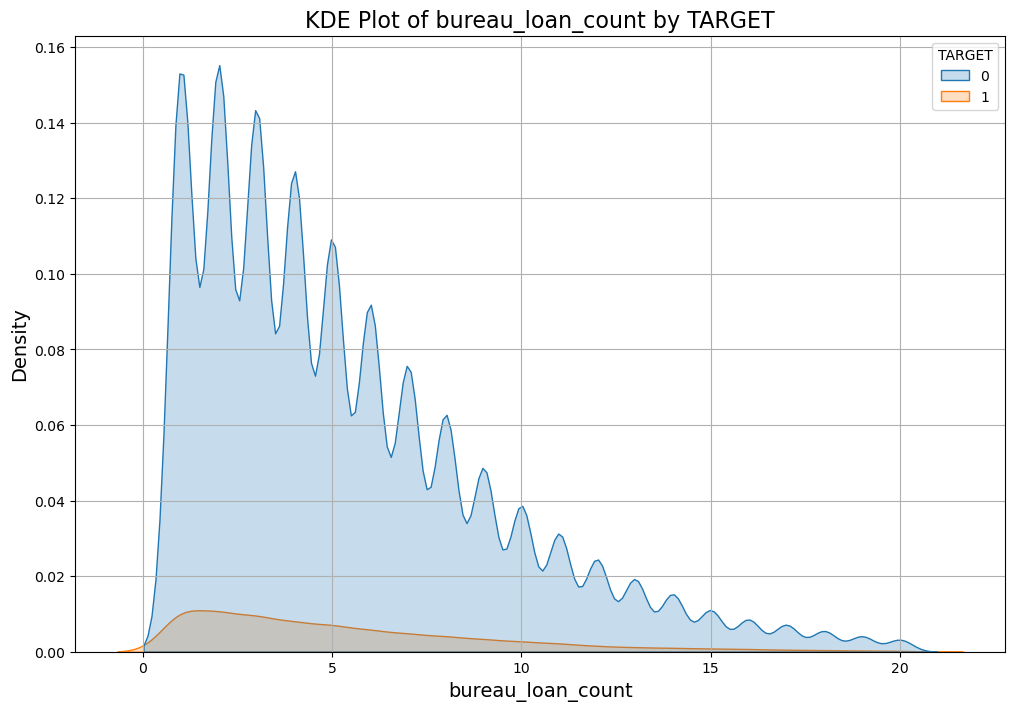

In [81]:
plot_kde(df,'bureau_loan_count',trim=0.99)

In [82]:
df.groupby('bureau_loan_count')['TARGET'].mean().reset_index()

,bureau_loan_count,TARGET
0,1.0,0.085884
1,2.0,0.078125
2,3.0,0.076082
3,4.0,0.071273
4,5.0,0.074445
5,6.0,0.072069
6,7.0,0.072715
7,8.0,0.074533
8,9.0,0.078075
9,10.0,0.079667


In [83]:
average_target_by_decile(df,'bureau_loan_count',ntiles=3)

,bureau_loan_count_decile,Average_TARGET
0,1.0,0.080157
1,2.0,0.072554
2,3.0,0.077976


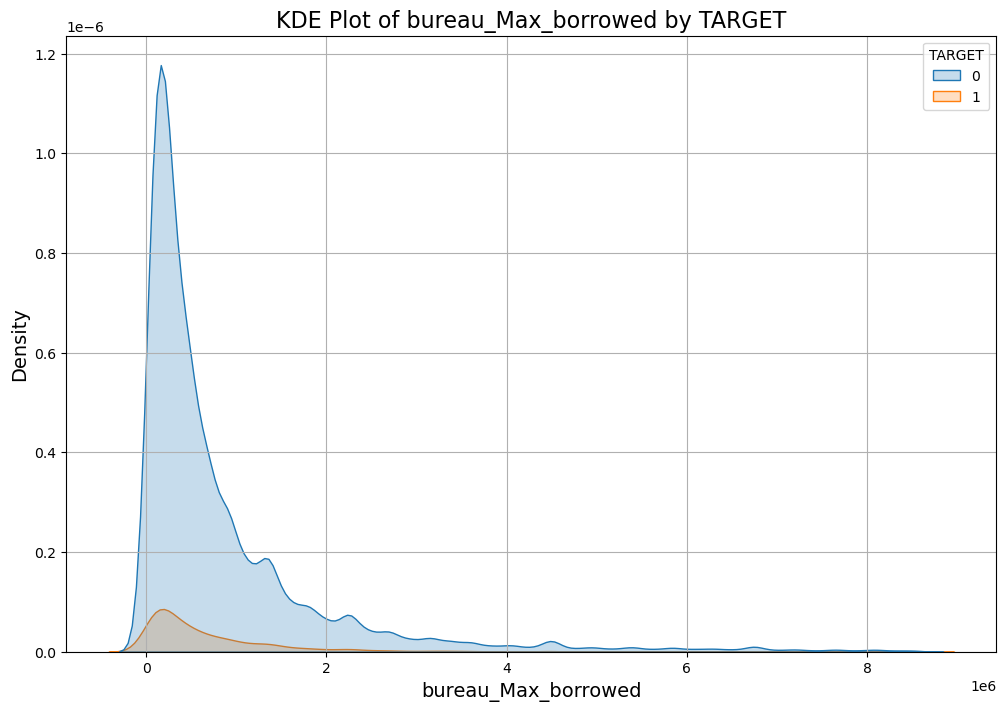

In [84]:
plot_kde(df,'bureau_Max_borrowed',trim=0.99)

In [85]:
average_target_by_decile(df,'bureau_Max_borrowed',ntiles=10)
# amount borrowed is low more default around 1% more

,bureau_Max_borrowed_decile,Average_TARGET
0,1.0,0.091844
1,2.0,0.076094
2,3.0,0.071629
3,4.0,0.075489
4,5.0,0.077305
5,6.0,0.080720
6,7.0,0.081968
7,8.0,0.083509
8,9.0,0.075210
9,10.0,0.058198


In [86]:
bureau.drop('Unnamed: 0',axis=1,inplace=True)
previous_application.drop('Unnamed: 0',axis=1,inplace=True)
pos_cash_balance.drop('Unnamed: 0',axis=1,inplace=True)
installments_payments.drop('Unnamed: 0',axis=1,inplace=True)
credit_card_balance.drop('Unnamed: 0',axis=1,inplace=True)
#application.head()
bureau_balance.drop('Unnamed: 0',axis=1,inplace=True)

In [87]:
bureau.head()
previous_application.head()
pos_cash_balance.head()
installments_payments.head()
credit_card_balance.head()
#application.head()
bureau_balance.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.00,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.76,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
2,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.89,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
3,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.50,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
4,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.34,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [88]:
previous_application_features=previous_application.groupby('SK_ID_CURR').agg(previous_loan_count=('SK_ID_PREV','nunique'),previous_Maxloan_borrowed=('AMT_APPLICATION','max')).reset_index() 
previous_application_features

,SK_ID_CURR,previous_loan_count,previous_Maxloan_borrowed
0,100002,1,179055.0
1,100003,3,900000.0
2,100004,1,24282.0
3,100006,9,688500.0
4,100007,6,247500.0
...,...,...,...
291052,456251,1,40455.0
291053,456252,1,57595.5
291054,456253,2,28912.5
291055,456254,2,223789.5


In [89]:
df_previous=application.merge(previous_application_features,how='left',on='SK_ID_CURR').reset_index()

In [90]:
df_previous.head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,amt_income_total_decile,amt_credit_decile,AMT_INCOME_TOTAL_decile,AMT_ANNUITY_decile,OCCUPATION_TYPE_thresholded,continuous_variable_decile,AGE,age_bucket,cnt_children_bucket,cnt_children_bucket_thresholded,age_bucket_thresholded,FLAG_OWN_CAR_thresholded,previous_loan_count,previous_Maxloan_borrowed
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4,2,8,3.0,Laborers,3.0,25.920548,25-35,0,0,25-35,N,1.0,179055.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,9,4.0,Core staff,4.0,45.931

In [91]:
pivot_total_defaults, default_by_amt_credit, pivot_row_wise_percentage, overall_data_percent = analyze_continous_vars(df_previous, 'AMT_INCOME_TOTAL', 'previous_Maxloan_borrowed')
pivot_total_defaults
default_by_amt_credit
pivot_row_wise_percentage
overall_data_percent

AMT_INCOME_TOTAL_decile,1,2,3,4,5
previous_Maxloan_borrowed_decile,,,,,
1.0,0.068316,0.075949,0.026001,0.043992,0.014678
2.0,0.045754,0.062613,0.022814,0.040805,0.017278
3.0,0.042399,0.064458,0.027092,0.047683,0.020214
4.0,0.033718,0.053428,0.026127,0.052715,0.025330
5.0,0.019543,0.041015,0.021808,0.060767,0.045502


previous_Maxloan_borrowed_decile
1.0    0.093718
2.0    0.077570
3.0    0.078000
4.0    0.083384
5.0    0.077269
Name: TARGET, dtype: float64

AMT_INCOME_TOTAL_decile,1,2,3,4,5
previous_Maxloan_borrowed_decile,,,,,
1.0,0.090702,0.100964,0.097240,0.094470,0.071839
2.0,0.073433,0.084820,0.082387,0.076530,0.064335
3.0,0.073426,0.082175,0.088663,0.078843,0.064053
4.0,0.089802,0.082518,0.090975,0.084453,0.070339
5.0,0.091823,0.081480,0.078633,0.078528,0.067521


AMT_INCOME_TOTAL_decile,1,2,3,4,5
previous_Maxloan_borrowed_decile,,,,,
1.0,0.061706,0.061627,0.021906,0.038151,0.016739
2.0,0.051045,0.060476,0.022686,0.043682,0.022003
3.0,0.047307,0.064262,0.025033,0.049547,0.025854
4.0,0.030760,0.053045,0.023528,0.051138,0.029503
5.0,0.017436,0.041239,0.022721,0.063397,0.055209


In [92]:
# high the Max_loan_borrowed and medium income more default
# very high the Max_loan_borrowed and verylow or low the income more default

In [93]:
pivot_total_defaults, default_by_continuous, pivot_row_wise_percentage, overall_data_percent = analyze_categorical_continuous(df_previous, 'age_bucket', 'previous_Maxloan_borrowed')
pivot_total_defaults
default_by_continuous
pivot_row_wise_percentage
overall_data_percent.to_clipboard()

continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
age_bucket_thresholded,,,,,
25-35,0.081443,0.068232,0.071378,0.056112,0.033802
35-45,0.064877,0.050493,0.054351,0.056406,0.060684
45-55,0.036611,0.031369,0.035899,0.040596,0.055232
55-65,0.022940,0.017404,0.024911,0.030069,0.035269
65-75,0.001636,0.002139,0.003942,0.002642,0.001678
<25,0.021430,0.019627,0.011365,0.005494,0.001971


,TARGET
age_bucket_thresholded,
25-35,0.106738
35-45,0.084045
45-55,0.070588
55-65,0.054154
65-75,0.037183
<25,0.123128


continuous_variable_decile,1.0,2.0,3.0,4.0,5.0
age_bucket_thresholded,,,,,
25-35,0.125452,0.098540,0.107947,0.113141,0.095430
35-45,0.094197,0.076464,0.079951,0.090921,0.085490
45-55,0.072557,0.064522,0.065145,0.074114,0.078881
55-65,0.057206,0.045430,0.052261,0.057429,0.056603
65-75,0.035879,0.036093,0.033017,0.042282,0.046893
<25,0.139427,0.123744,0.114105,0.124053,0.108545


In [94]:
df_previous['age_bucket'].value_counts()

age_bucket
35-45    84276
25-35    72289
45-55    70069
55-65    60605
<25      12150
65-75     8122
Name: count, dtype: int64

<Axes: xlabel='age_bucket', ylabel='count'>

Text(0.5, 0, 'Age Bucket')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Count of Defaults by Age Bucket')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '25-35'),
  Text(1, 0, '45-55'),
  Text(2, 0, '35-45'),
  Text(3, 0, '55-65'),
  Text(4, 0, '<25'),
  Text(5, 0, '65-75')])

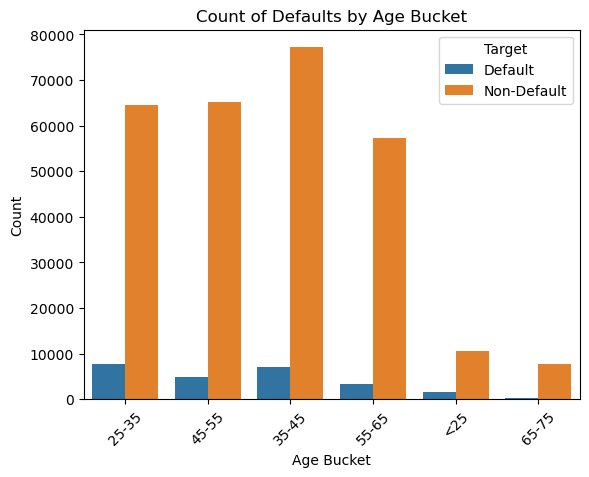

In [95]:
# Create a temporary column for plotting
df_previous['TARGET_LABEL'] = df_previous['TARGET'].map({0: 'Non-Default', 1: 'Default'})

# Plotting the count of defaults by age_bucket
sns.countplot(x='age_bucket', hue='TARGET_LABEL', data=df_previous)

# Adding labels and title for clarity
plt.xlabel('Age Bucket')
plt.ylabel('Count')
plt.title('Count of Defaults by Age Bucket')
plt.legend(title='Target', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

plt.show()

# Drop the temporary column
df_previous.drop('TARGET_LABEL', axis=1, inplace=True)


In [96]:
# age bucket with 25-35 and 35-45 have more num of defaults

In [116]:
ordinal_variables = [
    'AGE', 
    'CNT_CHILDREN', 
    'PREV_APP_APPROVAL_RATIO', 
    'PREV_APP_REFUSED_COUNT', 
    'BUREAU_ACTIVE_CREDIT_COUNT', 
    'BUREAU_DPD_MAX', 
    'BUREAU_CREDIT_TYPE_COUNT', 
    'POS_CASH_ACTIVE_INSTALLMENTS', 
    'POS_CASH_INSTALMENTS_COMPLETED_RATIO', 
    'INSTALMENTS_LATE_PAYMENT_RATIO'
]

categorical_variables = [
    'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY'
]

continuous_variables = [
    'INCOME', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 
    'PREV_APP_MAX_ANNUITY', 
    'PREV_APP_CREDIT_RATIO', 
    'INSTALMENTS_PAYMENT_AMOUNT_AVG', 
    'CC_BALANCE_MAX_DRAWINGS', 
    'CC_BALANCE_OVERDUE_RATIO'
]
id_var = ['SK_ID_CURR']
target = 'TARGET'

In [117]:
# Initialize an empty DataFrame for features
features = pd.DataFrame({'SK_ID_CURR': application['SK_ID_CURR']})

In [99]:
#data=previous_application.groupby('SK_ID_CURR')


In [100]:
#data=application.merge(pos_cash_balance,how='left',on='SK_ID_CURR').reset_index()

In [118]:
# Demographic Features
features['AGE'] = -application['DAYS_BIRTH'] / 365
features['INCOME'] = application['AMT_INCOME_TOTAL']
features['FLAG_OWN_CAR'] = application['FLAG_OWN_CAR']
features['FLAG_OWN_REALTY'] = application['FLAG_OWN_REALTY']
features['CNT_CHILDREN'] = application['CNT_CHILDREN']

In [119]:
# Current Loan Details
features['AMT_CREDIT'] = application['AMT_CREDIT']
features['AMT_ANNUITY'] = application['AMT_ANNUITY']
features['AMT_GOODS_PRICE'] = application['AMT_GOODS_PRICE']

In [120]:
prev_app_grouped = previous_application.groupby('SK_ID_CURR')
prev_app_features = pd.DataFrame({
    'SK_ID_CURR': prev_app_grouped.size().index,
    'PREV_APP_APPROVAL_RATIO': prev_app_grouped.apply(lambda x: (x['NAME_CONTRACT_STATUS'] == 'Approved').sum() / len(x)),
    'PREV_APP_MAX_ANNUITY': prev_app_grouped['AMT_ANNUITY'].max(),
    'PREV_APP_CREDIT_RATIO': prev_app_grouped.apply(lambda x: x.loc[x['NAME_CONTRACT_STATUS'] == 'Approved', 'AMT_CREDIT'].sum() / x['AMT_CREDIT'].sum()),
    'PREV_APP_REFUSED_COUNT': prev_app_grouped.apply(lambda x: (x['NAME_CONTRACT_STATUS'] == 'Refused').sum())
})

In [ ]:
# checking for the Approval ratio and Refused count for previous application

In [121]:
prev_app_features = prev_app_features.reset_index(drop = True)
prev_app_features

,SK_ID_CURR,PREV_APP_APPROVAL_RATIO,PREV_APP_MAX_ANNUITY,PREV_APP_CREDIT_RATIO,PREV_APP_REFUSED_COUNT
0,100002,1.000000,9251.775,1.000000,0
1,100003,1.000000,98356.995,1.000000,0
2,100004,1.000000,5357.250,1.000000,0
3,100006,0.555556,39954.510,0.654657,1
4,100007,1.000000,22678.785,1.000000,0
...,...,...,...,...,...
291052,456251,1.000000,6605.910,1.000000,0
291053,456252,1.000000,10074.465,1.000000,0
291054,456253,1.000000,5567.715,1.000000,0
291055,456254,1.000000,19065.825,1.000000,0


In [103]:
# Bureau Features
# number of active credit records for each client
bureau_active_credit_count = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR').size().rename('BUREAU_ACTIVE_CREDIT_COUNT') 
bureau_balance_dpd_max = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max().rename('BUREAU_DPD_MAX') # user wise maximum Day past due
bureau_combined = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_balance_dpd_max, on='SK_ID_BUREAU', how='left')
bureau_dpd_max = bureau_combined.groupby('SK_ID_CURR')['BUREAU_DPD_MAX'].max()
bureau_credit_type_count = bureau.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().rename('BUREAU_CREDIT_TYPE_COUNT')

bureau_features = pd.DataFrame({
    'SK_ID_CURR': bureau['SK_ID_CURR'].unique()
}).merge(bureau_active_credit_count, on='SK_ID_CURR', how='left').merge(
    bureau_dpd_max, on='SK_ID_CURR', how='left').merge(
    bureau_credit_type_count, on='SK_ID_CURR', how='left')

In [104]:
bureau_features
bureau_features.isnull().sum()/bureau_features.shape[0]

,SK_ID_CURR,BUREAU_ACTIVE_CREDIT_COUNT,BUREAU_DPD_MAX,BUREAU_CREDIT_TYPE_COUNT
0,215354,6.0,NaN,3
1,162297,3.0,NaN,3
2,402440,1.0,NaN,1
3,238881,3.0,NaN,2
4,222183,5.0,NaN,3
...,...,...,...,...
263486,207190,NaN,0.0,1
263487,324956,NaN,0.0,1
263488,448157,1.0,NaN,1
263489,345866,NaN,0.0,1


SK_ID_CURR                    0.000000
BUREAU_ACTIVE_CREDIT_COUNT    0.175873
BUREAU_DPD_MAX                0.649965
BUREAU_CREDIT_TYPE_COUNT      0.000000
dtype: float64

In [105]:
# POS Cash Features
pos_cash_active_installments = pos_cash_balance[pos_cash_balance['NAME_CONTRACT_STATUS'] == 'Active'].groupby('SK_ID_CURR').size().rename('POS_CASH_ACTIVE_INSTALLMENTS')
pos_cash_completed_ratio = (pos_cash_balance[pos_cash_balance['NAME_CONTRACT_STATUS'] == 'Completed'].groupby('SK_ID_CURR').size() / pos_cash_balance.groupby('SK_ID_CURR').size()).rename('POS_CASH_INSTALMENTS_COMPLETED_RATIO')

pos_cash_features = pd.DataFrame({
    'SK_ID_CURR': pos_cash_balance['SK_ID_CURR'].unique()
}).merge(pos_cash_active_installments, on='SK_ID_CURR', how='left').merge(
    pos_cash_completed_ratio, on='SK_ID_CURR', how='left')

In [106]:
pos_cash_features
pos_cash_features.isnull().sum()/pos_cash_features.shape[0]

,SK_ID_CURR,POS_CASH_ACTIVE_INSTALLMENTS,POS_CASH_INSTALMENTS_COMPLETED_RATIO
0,182943,42.0,0.023256
1,367990,25.0,0.074074
2,397406,102.0,0.055046
3,269225,109.0,0.043860
4,334279,121.0,0.031746
...,...,...,...
289439,185413,NaN,NaN
289440,326688,1.0,NaN
289441,394310,1.0,NaN
289442,240059,NaN,1.000000


SK_ID_CURR                              0.000000
POS_CASH_ACTIVE_INSTALLMENTS            0.000701
POS_CASH_INSTALMENTS_COMPLETED_RATIO    0.111345
dtype: float64

In [107]:
# Installments Payments Features
installments_late_payment_ratio = (installments_payments.groupby('SK_ID_CURR').apply(lambda x: (x['DAYS_ENTRY_PAYMENT'] > x['DAYS_INSTALMENT']).sum() / len(x))).rename('INSTALMENTS_LATE_PAYMENT_RATIO')
installments_payment_amount_avg = installments_payments.groupby('SK_ID_CURR')['AMT_PAYMENT'].mean().rename('INSTALMENTS_PAYMENT_AMOUNT_AVG')

installments_features = pd.DataFrame({
    'SK_ID_CURR': installments_payments['SK_ID_CURR'].unique()
}).merge(installments_late_payment_ratio, on='SK_ID_CURR', how='left').merge(
    installments_payment_amount_avg, on='SK_ID_CURR', how='left')

In [108]:
installments_features
installments_features.isnull().sum()/installments_features.shape[0]

,SK_ID_CURR,INSTALMENTS_LATE_PAYMENT_RATIO,INSTALMENTS_PAYMENT_AMOUNT_AVG
0,161674,0.000000,12600.013812
1,151639,0.069620,9240.438418
2,193053,0.333333,11483.070000
3,199697,0.407407,14910.156667
4,167756,0.300000,3492.061500
...,...,...,...
291638,440887,0.000000,32944.185000
291639,420608,0.000000,15447.015000
291640,427056,0.000000,6982.807500
291641,413433,0.000000,656487.945000


SK_ID_CURR                        0.000000
INSTALMENTS_LATE_PAYMENT_RATIO    0.000000
INSTALMENTS_PAYMENT_AMOUNT_AVG    0.000027
dtype: float64

In [109]:
# Credit Card Balance Features
cc_balance_max_drawings = credit_card_balance.groupby('SK_ID_CURR')['AMT_DRAWINGS_CURRENT'].max().rename('CC_BALANCE_MAX_DRAWINGS')
cc_balance_overdue_ratio = (credit_card_balance.groupby('SK_ID_CURR').apply(lambda x: (x['AMT_BALANCE'] > x['AMT_CREDIT_LIMIT_ACTUAL']).sum() / len(x))).rename('CC_BALANCE_OVERDUE_RATIO')

cc_features = pd.DataFrame({
    'SK_ID_CURR': credit_card_balance['SK_ID_CURR'].unique()
}).merge(cc_balance_max_drawings, on='SK_ID_CURR', how='left').merge(
    cc_balance_overdue_ratio, on='SK_ID_CURR', how='left')

In [110]:
cc_features.isnull().sum()/cc_features.shape[0]

SK_ID_CURR                  0.0
CC_BALANCE_MAX_DRAWINGS     0.0
CC_BALANCE_OVERDUE_RATIO    0.0
dtype: float64

In [111]:
ext_source_avg = application[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].set_index('SK_ID_CURR').mean(axis=1).rename('EXT_SOURCE_AVG')

ext_source_features = pd.DataFrame({
    'SK_ID_CURR': application['SK_ID_CURR'],
    'EXT_SOURCE_AVG': ext_source_avg
})

In [112]:
ext_source_avg
ext_source_avg.isnull().sum()/ext_source_avg.shape[0]

SK_ID_CURR
100002    0.161787
100003    0.466757
100004    0.642739
100006    0.650442
100007    0.322738
            ...   
456251    0.413601
456252    0.115992
456253    0.499536
456254    0.587593
456255    0.518984
Name: EXT_SOURCE_AVG, Length: 307511, dtype: float64

0.0005593295849579365

In [113]:
# Merge all features into a single DataFrame
final_features = features.merge(prev_app_features, on='SK_ID_CURR', how='left').merge(
    bureau_features, on='SK_ID_CURR', how='left').merge(
    pos_cash_features, on='SK_ID_CURR', how='left').merge(
    installments_features, on='SK_ID_CURR', how='left').merge(
    cc_features, on='SK_ID_CURR', how='left').merge(
    ext_source_features, on='SK_ID_CURR', how='left')

# Merge with the application data to include the TARGET variable
final_dataset = application[['SK_ID_CURR', 'TARGET']].merge(final_features, on='SK_ID_CURR', how='left')

# Display the first few rows of the final dataset including the TARGET variable
final_dataset.head()

,SK_ID_CURR,TARGET,PREV_APP_APPROVAL_RATIO,PREV_APP_MAX_ANNUITY,PREV_APP_CREDIT_RATIO,PREV_APP_REFUSED_COUNT,BUREAU_ACTIVE_CREDIT_COUNT,BUREAU_DPD_MAX,BUREAU_CREDIT_TYPE_COUNT,POS_CASH_ACTIVE_INSTALLMENTS,POS_CASH_INSTALMENTS_COMPLETED_RATIO,INSTALMENTS_LATE_PAYMENT_RATIO,INSTALMENTS_PAYMENT_AMOUNT_AVG,CC_BALANCE_MAX_DRAWINGS,CC_BALANCE_OVERDUE_RATIO,EXT_SOURCE_AVG
0,100002,1,1.000000,9251.775,1.000000,0.0,2.0,0.0,2.0,19.0,NaN,0.000000,11559.247105,NaN,NaN,NaN
1,100003,0,1.000000,98356.995,1.000000,0.0,1.0,NaN,2.0,26.0,0.071429,0.000000,64754.586000,NaN,NaN,NaN
2,100004,0,1.000000,5357.250,1.000000,0.0,NaN,NaN,1.0,3.0,0.250000,0.000000,7096.155000,NaN,NaN,NaN
3,100006,0,0.555556,39954.510,0.654657,1.0,NaN,NaN,NaN,18.0,0.095238,0.000000,62947.088438,0.0,0.0,NaN
4,100007,0,1.000000,22678.785,1.000000,0.0,NaN,NaN,1.0,62.0,0.045455,0.242424,12214.060227,NaN,NaN,NaN


In [114]:
final_dataset.isnull().sum().sort_values(ascending = False)/final_dataset.shape[0]

CC_BALANCE_MAX_DRAWINGS                 0.717392
CC_BALANCE_OVERDUE_RATIO                0.717392
BUREAU_DPD_MAX                          0.700073
EXT_SOURCE_AVG                          0.418024
BUREAU_ACTIVE_CREDIT_COUNT              0.293846
POS_CASH_INSTALMENTS_COMPLETED_RATIO    0.163555
BUREAU_CREDIT_TYPE_COUNT                0.143149
POS_CASH_ACTIVE_INSTALLMENTS            0.059413
PREV_APP_MAX_ANNUITY                    0.054863
PREV_APP_CREDIT_RATIO                   0.054245
PREV_APP_APPROVAL_RATIO                 0.053507
PREV_APP_REFUSED_COUNT                  0.053507
INSTALMENTS_PAYMENT_AMOUNT_AVG          0.051627
INSTALMENTS_LATE_PAYMENT_RATIO          0.051601
SK_ID_CURR                              0.000000
TARGET                                  0.000000
dtype: float64

In [ ]:
calculate_decile_log_odds_r2(final_dataset, 'INCOME', 'TARGET')

In [ ]:
def winsorize(df, variable, method='IQR'):
    dataframe = df.copy()
    if method == 'IQR':
        Q1 = dataframe[variable].quantile(0.25)
        Q3 = dataframe[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'SD':
        mean = dataframe[variable].mean()
        std_dev = dataframe[variable].std()
        lower_bound = mean - 2 * std_dev
        upper_bound = mean + 2 * std_dev
    else:
        raise ValueError("Method should be either 'IQR' or 'SD'")
    
    # Apply the capping
    dataframe[variable] = dataframe[variable].clip(lower=lower_bound, upper=upper_bound)
    
    return dataframe, lower_bound, upper_bound


In [ ]:
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, 'INCOME', 'IQR')

In [ ]:
calculate_decile_log_odds_r2(new_dataset, 'INCOME', 'TARGET')

In [ ]:
bounds = {}

In [ ]:
bounds

In [ ]:
def cap_values_and_calculate_r2(dataframe, variable, target):
    current_r2 = calculate_decile_log_odds_r2(dataframe, variable, target)
    improving = True
    iteration = 0
    mean_initial = dataframe[variable].mean()
    median_initial = dataframe[variable].median()
    
    # Initialize bounds for the variable
    if variable not in bounds:
        bounds[variable] = {'lower_bound': None, 'upper_bound': None}

    while improving:
        iteration += 1
        print(f"Iteration {iteration}")
        
        # Create deciles
        dataframe['decile'] = pd.qcut(dataframe[variable], 10, labels=False, duplicates='drop')
        
        # Identify the min and max values for the second lowest and second highest deciles
        decile_stats = dataframe.groupby('decile')[variable].agg(['min', 'max'])
        second_lowest_max = decile_stats.iloc[1]['max']
        second_highest_min = decile_stats.iloc[-2]['min']
        
        # Try removing the lowest decile
        dataframe_without_lowest = dataframe[dataframe['decile'] > 0]
        r2_without_lowest = calculate_decile_log_odds_r2(dataframe_without_lowest, variable, target)
        
        # Try removing the highest decile
        dataframe_without_highest = dataframe[dataframe['decile'] < 9]
        r2_without_highest = calculate_decile_log_odds_r2(dataframe_without_highest, variable, target)
        
        # Print R2 values for removing lowest and highest deciles
        print(f"Old R2: {current_r2}, R2 after removing lowest decile: {r2_without_lowest}, R2 after removing highest decile: {r2_without_highest}")
        
        improved_low = False
        if r2_without_lowest > current_r2:
            print(f"Improved R2 by removing lowest decile. Capping values to {second_lowest_max}.")
            dataframe[variable] = dataframe[variable].where(dataframe['decile'] > 0, second_lowest_max)
            current_r2 = r2_without_lowest
            bounds[variable]['lower_bound'] = second_lowest_max
            improved_low = True
        
        improved_high = False
        if r2_without_highest > current_r2:
            print(f"Improved R2 by removing highest decile. Capping values to {second_highest_min}.")
            dataframe[variable] = dataframe[variable].where(dataframe['decile'] < 9, second_highest_min)
            current_r2 = r2_without_highest
            bounds[variable]['upper_bound'] = second_highest_min
            improved_high = True
        
        if not improved_low and not improved_high:
            print("No improvement in R2. Stopping iterations.")
            improving = False
    mean_final = dataframe[variable].mean()
    median_final = dataframe[variable].median()
    print("Statistics before..:")
    print((mean_initial, median_initial))
    print((mean_final, median_final))
    return dataframe, current_r2


In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), 'INCOME', 'TARGET')

In [ ]:
bounds

In [ ]:
final_dataset

In [ ]:
#INCOME
var = 'INCOME'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'IQR')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    final_dataset, _, _ = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
upper_bound
lower_bound

In [ ]:
#AMT_CREDIT
var = 'AMT_CREDIT'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'IQR')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), 'AMT_CREDIT', 'TARGET')
bounds

In [ ]:
# AMT_ANNUITY
var = 'AMT_ANNUITY'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')

In [ ]:
bounds

In [ ]:
# AMT_GOODS_PRICE
var = 'AMT_GOODS_PRICE'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [ ]:
#PREV_APP_MAX_ANNUITY
var = 'PREV_APP_MAX_ANNUITY'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [115]:
var = 'PREV_APP_CREDIT_RATIO'
calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset = impute_missing_values(final_dataset, var)
calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
new_dataset = impute_missing_values(final_dataset, var, method = 'median')
calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')

NameError: name 'calculate_decile_log_odds_r2' is not defined

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [ ]:
#     'INSTALMENTS_PAYMENT_AMOUNT_AVG'
var = 'INSTALMENTS_PAYMENT_AMOUNT_AVG'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [ ]:
var = 'CC_BALANCE_MAX_DRAWINGS'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [ ]:
var = 'CC_BALANCE_OVERDUE_RATIO'
initial_r2 = calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
new_r2 = calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
initial_r2
new_r2

if(new_r2>initial_r2):
    bounds[var] = {'lower_bound': lower_bound, 'upper_bound': lower_bound}
    final_dataset, lower_bound, upper_bound = winsorize(final_dataset, var, 'SD')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [ ]:
final_dataset, _ = cap_values_and_calculate_r2(final_dataset.copy(), var, 'TARGET')
bounds

In [ ]:
missing_value = {}

In [ ]:
final_dataset

In [ ]:
final_dataset[continuous_variables].isnull().sum()/final_dataset[continuous_variables].shape[0]

In [ ]:
def impute_missing_values(df, variable, method='mean'):
    dataframe = df.copy()
    if method not in ['mean', 'median']:
        raise ValueError("Method must be 'mean' or 'median'")

    if method == 'mean':
        impute_value = dataframe[variable].mean()
    elif method == 'median':
        impute_value = dataframe[variable].median()

    dataframe[variable].fillna(impute_value, inplace=True)
    
    return dataframe

In [ ]:
continuous_variables = [
    'INCOME', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 
    'PREV_APP_MAX_ANNUITY', 
    'PREV_APP_CREDIT_RATIO', 
    'INSTALMENTS_PAYMENT_AMOUNT_AVG', 
    'CC_BALANCE_MAX_DRAWINGS', 
    'CC_BALANCE_OVERDUE_RATIO'
]

In [ ]:
var = 'PREV_APP_CREDIT_RATIO'
calculate_decile_log_odds_r2(final_dataset, var, 'TARGET')
new_dataset = impute_missing_values(final_dataset, var)
calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')
new_dataset = impute_missing_values(final_dataset, var, method = 'median')
calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')

In [ ]:
def standardize_nans(dataframe):
    # Replace unusual NaN representations with np.nan
    dataframe.replace(['', 'NA', 'NaN', 'null', 'NULL', '-'], np.nan, inplace=True)
    return dataframe

def calculate_log_odds(dataframe, variable, target):
    # Calculate log of odds for each group
    def log_odds(x):
        mean_x = x.mean()
        if mean_x == 0:
            return float('-inf')  # Log odds for a mean of 0
        elif mean_x == 1:
            return float('inf')   # Log odds for a mean of 1
        else:
            return np.log(mean_x / (1 - mean_x))
    
    group_stats = dataframe.groupby(variable).agg({target: log_odds}).reset_index()
    group_stats.columns = [variable, 'log_odds']
    return group_stats

def impute_missing_values_custom(df, variable, target):
    dataframe = df.copy()
    # Standardize NaN representations
    dataframe = standardize_nans(dataframe)
    
    # Check if there are any missing values in the variable
    if dataframe[variable].isna().sum() == 0:
        print(f"No missing values in variable '{variable}'. Skipping imputation.")
        return dataframe, None
    
    # Separate rows with and without missing values in the variable
    non_missing_df = dataframe.dropna(subset=[variable])
    missing_df = dataframe[dataframe[variable].isna()]
    
    # Create deciles excluding missing values
    non_missing_df['decile'] = pd.qcut(non_missing_df[variable], 10, labels=False, duplicates='drop')
    
    # Calculate log of odds for each decile
    decile_log_odds = calculate_log_odds(non_missing_df, 'decile', target)
    
    # Calculate log of odds for the null group
    null_mean = missing_df[target].mean()
    if null_mean in [0, 1]:
        null_log_odds = float('inf') if null_mean == 1 else float('-inf')
    else:
        null_log_odds = np.log(null_mean / (1 - null_mean))
    
    # Find the closest decile log of odds to the null log of odds
    decile_log_odds['difference'] = (decile_log_odds['log_odds'] - null_log_odds).abs()
    closest_decile_idx = decile_log_odds['difference'].idxmin()
    closest_decile = decile_log_odds.loc[closest_decile_idx, 'decile']
    
    # Impute missing values with the mean of the closest decile
    impute_value = non_missing_df[non_missing_df['decile'] == closest_decile][variable].mean()
    dataframe[variable].fillna(impute_value, inplace=True)
    
    # Return the dataframe and the imputed value
    return dataframe, impute_value


In [ ]:
new_dataset, impute_value = impute_missing_values_custom(final_dataset, var, 'TARGET')
calculate_decile_log_odds_r2(new_dataset, var, 'TARGET')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Main process to evaluate imputation methods
def evaluate_and_impute(df, variable, target):
    dataframe = df.copy()
    methods = ['mean', 'median', 'custom']
    best_method = None
    best_r2 = -np.inf
    best_impute_value = None

    for method in methods:
        if method == 'custom':
            imputed_df, impute_value = impute_missing_values_custom(dataframe.copy(), variable, target)
        else:
            imputed_df = impute_missing_values(dataframe.copy(), variable, method)
            impute_value = imputed_df[variable].median() if method == 'median' else imputed_df[variable].mean()
        
        r2 = calculate_decile_log_odds_r2(imputed_df, variable, target)
        print(f"Method: {method}, R2: {r2}")
        
        if r2 > best_r2:
            best_r2 = r2
            best_method = method
            best_impute_value = impute_value
    
    print(f"Best method for {variable}: {best_method} with R2: {best_r2}")
    return best_method, best_impute_value

best_methods = {}
for var in continuous_variables:
    best_method, best_impute_value = evaluate_and_impute(final_dataset, var, 'TARGET')
    best_methods[var] = {'method': best_method, 'impute_value': best_impute_value}

print("Best methods for each variable:", best_methods)


In [ ]:
best_methods

In [ ]:
final_dataset[continuous_variables].isnull().sum()/final_dataset[continuous_variables].shape[0]

In [ ]:
final_dataset[continuous_variables].isnull().sum()

In [ ]:
for variable in best_methods:
    impute_value = best_methods[variable]['impute_value']
    final_dataset[variable].fillna(impute_value, inplace=True)
    print(f"Imputed {variable} with value {impute_value} using method {best_methods[variable]['method']}")

In [ ]:
final_dataset[continuous_variables].isnull().sum()/final_dataset.shape[0]

In [ ]:
ordinal_variables = [
    'AGE', 
    'CNT_CHILDREN', 
    'PREV_APP_APPROVAL_RATIO', 
    'PREV_APP_REFUSED_COUNT', 
    'BUREAU_ACTIVE_CREDIT_COUNT', 
    'BUREAU_DPD_MAX', 
    'BUREAU_CREDIT_TYPE_COUNT', 
    'POS_CASH_ACTIVE_INSTALLMENTS', 
    'POS_CASH_INSTALMENTS_COMPLETED_RATIO', 
    'INSTALMENTS_LATE_PAYMENT_RATIO'
]

In [ ]:
def evaluate_woe_grouping(dataframe, variable, target):
    woe_df, iv, woe_null = calculate_woe_iv(dataframe, variable, target)
    
    # Check monotonicity
    monotonic = woe_df['woe'].is_monotonic_increasing or woe_df['woe'].is_monotonic_decreasing
    
    # Check sample size in each bin
    min_sample_size = woe_df['count'].min()
    
    # Chi-square test for statistical significance
    chi2, p, _, _ = chi2_contingency(pd.crosstab(dataframe[variable], dataframe[target]))
    
    return {
        'monotonic': monotonic,
        'min_sample_size': min_sample_size,
        'chi2_p_value': p,
        'information_value': iv,
        'woe_df': woe_df
    }


In [ ]:
def calculate_woe_iv(dataframe, variable, target):
    total_good = (dataframe[target] == 0).sum()
    total_bad = (dataframe[target] == 1).sum()
    
    # Handle missing values separately
    non_missing_df = dataframe.dropna(subset=[variable])
    missing_df = dataframe[dataframe[variable].isna()]
    
    # Group non-missing values
    grouped = non_missing_df.groupby(variable)[target].agg(['count', 'sum'])
    grouped['bad'] = grouped['sum']
    grouped['good'] = grouped['count'] - grouped['bad']
    
    grouped['woe'] = np.log((grouped['good'] / total_good) / (grouped['bad'] / total_bad))
    grouped['iv'] = (grouped['good'] / total_good - grouped['bad'] / total_bad) * grouped['woe']
    iv = grouped['iv'].sum()
    
    # Calculate WOE for nulls
    if len(missing_df) > 0:
        null_good = (missing_df[target] == 0).sum()
        null_bad = (missing_df[target] == 1).sum()
        woe_null = np.log((null_good / total_good) / (null_bad / total_bad))
    else:
        woe_null = None
    
    return grouped[['count', 'woe', 'iv']], iv, woe_null

def bins_to_woe_dict(variable, bins, woe_values, woe_null):
    var_woe_dict = {
        'bins': [],
        'woe': [],
        'woe_null': woe_null
    }
    for i in range(len(bins)):
        bin_value = bins[i]
        if isinstance(bin_value, pd.Interval):  # This indicates a range
            bin_lower_value = bin_value.left
            bin_upper_value = bin_value.right
            var_woe_dict['bins'].append((bin_lower_value, bin_upper_value))
        else:  # Single value
            var_woe_dict['bins'].append(bin_value)
        var_woe_dict['woe'].append(woe_values[i])
    return var_woe_dict

def add_variable_to_woe_dict(woe_dict, variable, bins, woe_values, woe_null):
    woe_dict[variable] = bins_to_woe_dict(variable, bins, woe_values, woe_null)
    return woe_dict

In [ ]:
woe_dict = {}

In [ ]:
# Assume final_dataset is already defined and loaded
# Create groupings for AGE variable
final_dataset['AGE_BIN'] = pd.cut(final_dataset['AGE'], 7, duplicates='drop')
# Evaluate WOE grouping for 'AGE_BIN'
evaluation = evaluate_woe_grouping(final_dataset, 'AGE_BIN', 'TARGET')
evaluation
evaluation['woe_df']

In [ ]:
# final_dataset['AGE_BIN'] = pd.cut(final_dataset['AGE'], bins=5, include_lowest=True)
# Calculate WOE for AGE_BIN
woe_df, iv, woe_null = calculate_woe_iv(final_dataset, 'AGE_BIN', 'TARGET')
# Extract bins and WOE values
bins = woe_df.index.categories
woe_values = woe_df['woe'].values
# Add AGE information to WOE dictionary
woe_dict = add_variable_to_woe_dict(woe_dict, 'AGE', bins, woe_values, woe_null)

In [ ]:
woe_dict

In [ ]:
var = 'BUREAU_ACTIVE_CREDIT_COUNT'
final_dataset['BUREAU_ACTIVE_CREDIT_COUNT_BIN'] = pd.cut(final_dataset[var], 2, duplicates='drop')
# Evaluate WOE grouping for 'AGE_BIN'
evaluation = evaluate_woe_grouping(final_dataset, 'BUREAU_ACTIVE_CREDIT_COUNT_BIN', 'TARGET')
print(evaluation)
evaluation['woe_df']

In [ ]:
woe_df, iv, woe_null = calculate_woe_iv(final_dataset, 'BUREAU_ACTIVE_CREDIT_COUNT_BIN', 'TARGET')
# Extract bins and WOE values
bins = woe_df.index.categories
woe_values = woe_df['woe'].values
# Add AGE information to WOE dictionary
woe_dict = add_variable_to_woe_dict(woe_dict, 'BUREAU_ACTIVE_CREDIT_COUNT', bins, woe_values, woe_null)

In [ ]:
woe_dict

In [ ]:
def apply_woe_binning(dataframe, variable, woe_dict):
    var_woe_dict = woe_dict[variable]
    
    # Define the function to map the values to WOE bins
    def map_woe(value):
        if pd.isna(value):
            return var_woe_dict['woe_null']
        for bin_range, woe in zip(var_woe_dict['bins'], var_woe_dict['woe']):
            if bin_range[0] <= value <= bin_range[1]:
                return woe
        return np.nan
    
    # Apply the function to the dataframe
    dataframe[f'{variable}_WOE'] = dataframe[variable].apply(map_woe)
    
    # Handle missing WOE values
    if var_woe_dict['woe_null'] is None:
        print("Using median for null WOE values")
        dataframe[f'{variable}_WOE'] = dataframe[f'{variable}_WOE'].fillna(dataframe[f'{variable}_WOE'].median())
    else:
        print(f"Using specified WOE null value for {variable}: {var_woe_dict['woe_null']}")
        dataframe[f'{variable}_WOE'] = dataframe[f'{variable}_WOE'].fillna(var_woe_dict['woe_null'])
    
    return dataframe

In [ ]:
for var in woe_dict:
    final_dataset = apply_woe_binning(final_dataset, var, woe_dict)

In [ ]:
final_dataset[['AGE_WOE', 'BUREAU_ACTIVE_CREDIT_COUNT_WOE']].isnull().sum()
final_dataset[['AGE_WOE', 'BUREAU_ACTIVE_CREDIT_COUNT_WOE']]
final_dataset[['AGE', 'BUREAU_ACTIVE_CREDIT_COUNT']]

In [ ]:
final_dataset['FLAG_OWN_CAR'] = final_dataset['FLAG_OWN_CAR'].map({'Y':1, 'N':0}).fillna(0)
final_dataset['FLAG_OWN_REALTY'] = final_dataset['FLAG_OWN_REALTY'].map({'Y':1, 'N':0}).fillna(0)

In [ ]:
id_var = ['SK_ID_CURR']
final_vars = continuous_variables + ['AGE_WOE', 'BUREAU_ACTIVE_CREDIT_COUNT_WOE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
target = 'TARGET'
final_vars

In [ ]:
df_ml = final_dataset[id_var + final_vars + [target]]
df_ml